In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import seaborn as sns
import pickle

In [2]:
dataframe = pd.read_csv(rf'..\data\Մարդաչափական տվյալների հարցում.csv')
dataframe.head()

date_created   date_modified      ip_address  Ձեր սեռը  \
0             NaN             NaN             NaN  Response   
1  2/8/2022 10:30  2/8/2022 10:33     91.196.36.8    Իգական   
2   2/8/2022 8:29   2/8/2022 8:30   217.76.10.130    Իգական   
3   2/8/2022 1:30   2/8/2022 1:31   87.241.184.71    Իգական   
4   2/8/2022 0:08   2/8/2022 0:09  185.215.55.203    Իգական   

            Ձեր տարիքը      Ձեր հասակը (սմ)             Ձեր քաշը  \
0  Open-Ended Response  Open-Ended Response  Open-Ended Response   
1                   16                  165                   55   
2                   16                  154                   42   
3                   17                  167                   56   
4                   18                  165                   70   

      Ձեր կոշիկի չափսը Ձեր տաբատի չափսը Ձեր վերնազգեստի (майка) չափսը  
0  Open-Ended Response         Response                      Response  
1                   38        M (38-39)                             M  
2                   35       XS (34-35)                            XS  
3                   38        M (38-39)                             M  
4                   40        L (40-41)                             M

In [3]:
data = dataframe[['Ձեր սեռը', 
                  'Ձեր տարիքը', 
                  'Ձեր հասակը (սմ)', 
                  'Ձեր քաշը', 
                  'Ձեր տաբատի չափսը']]
data.head()

Ձեր սեռը           Ձեր տարիքը      Ձեր հասակը (սմ)             Ձեր քաշը  \
0  Response  Open-Ended Response  Open-Ended Response  Open-Ended Response   
1    Իգական                   16                  165                   55   
2    Իգական                   16                  154                   42   
3    Իգական                   17                  167                   56   
4    Իգական                   18                  165                   70   

  Ձեր տաբատի չափսը  
0         Response  
1        M (38-39)  
2       XS (34-35)  
3        M (38-39)  
4        L (40-41)

In [4]:
data.columns = ['sex', 'age', 'height', 'weight', 'jeans_size']

In [5]:
data = data.drop(0)
data.head()

sex age height weight  jeans_size
1  Իգական  16    165     55   M (38-39)
2  Իգական  16    154     42  XS (34-35)
3  Իգական  17    167     56   M (38-39)
4  Իգական  18    165     70   L (40-41)
5  Արական  16    183     72  XL (42-43)

In [6]:
data.shape

(306, 5)

In [7]:
data.dropna(inplace=True)
data.head()

sex age height weight  jeans_size
1  Իգական  16    165     55   M (38-39)
2  Իգական  16    154     42  XS (34-35)
3  Իգական  17    167     56   M (38-39)
4  Իգական  18    165     70   L (40-41)
5  Արական  16    183     72  XL (42-43)

In [8]:
data.drop_duplicates(inplace=True)
data.head()

sex age height weight  jeans_size
1  Իգական  16    165     55   M (38-39)
2  Իգական  16    154     42  XS (34-35)
3  Իգական  17    167     56   M (38-39)
4  Իգական  18    165     70   L (40-41)
5  Արական  16    183     72  XL (42-43)

In [9]:
data.shape

(286, 5)

In [10]:
data[['age', 'height', 'weight']] = data[['age', 'height', 'weight']].astype(float)
data.head()

sex   age  height  weight  jeans_size
1  Իգական  16.0   165.0    55.0   M (38-39)
2  Իգական  16.0   154.0    42.0  XS (34-35)
3  Իգական  17.0   167.0    56.0   M (38-39)
4  Իգական  18.0   165.0    70.0   L (40-41)
5  Արական  16.0   183.0    72.0  XL (42-43)

In [11]:
jeans_sizes = {
    'XS (34-35)': 0,
    'S (36-37)': 1,
    'M (38-39)': 2,
    'L (40-41)': 3,
    'XL (42-43)': 4,
    'XXL (44-45)': 5,
    '3XL (46>)': 6
}

In [12]:
j_sizes = {
    0: 'XS (34-35)',
    1: 'S (36-37)',
    2: 'M (38-39)',
    3: 'L (40-41)',
    4: 'XL (42-43)',
    5: 'XXL (44-45)',
    6: '3XL (46>)'
}

In [13]:
sex_encoder = LabelEncoder()
viz_data = data.copy()
viz_data['sex'] = sex_encoder.fit_transform(data['sex'])

viz_data['jeans_size'] = data['jeans_size'].apply(lambda x: jeans_sizes[x])

viz_data.head()

sex   age  height  weight  jeans_size
1    1  16.0   165.0    55.0           2
2    1  16.0   154.0    42.0           0
3    1  17.0   167.0    56.0           2
4    1  18.0   165.0    70.0           3
5    0  16.0   183.0    72.0           4

<AxesSubplot:xlabel='height', ylabel='weight'>

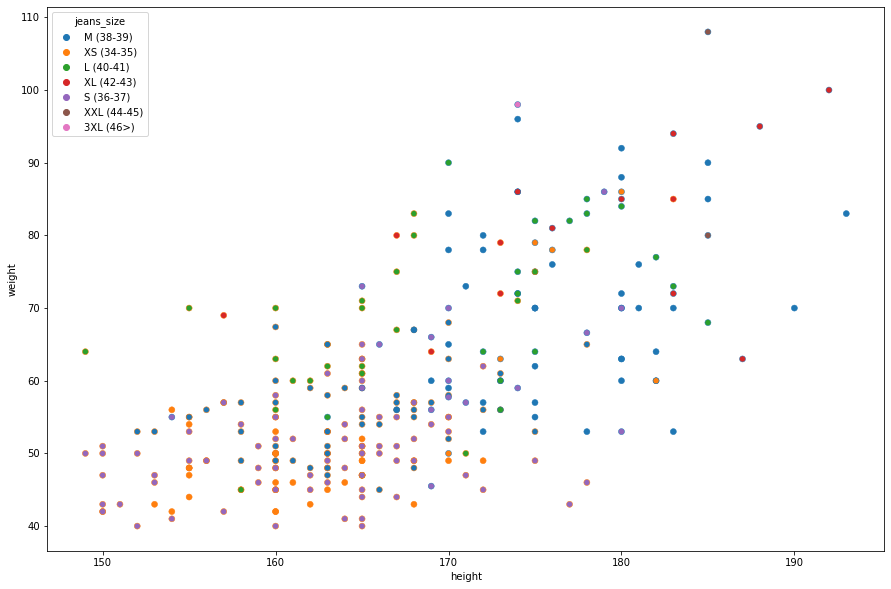

In [14]:
palette = {0: "C0", 1: "C1"}
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(data=viz_data, x='height', y='weight', hue=viz_data['jeans_size'].map(j_sizes), 
                edgecolor=viz_data["sex"].map(palette))

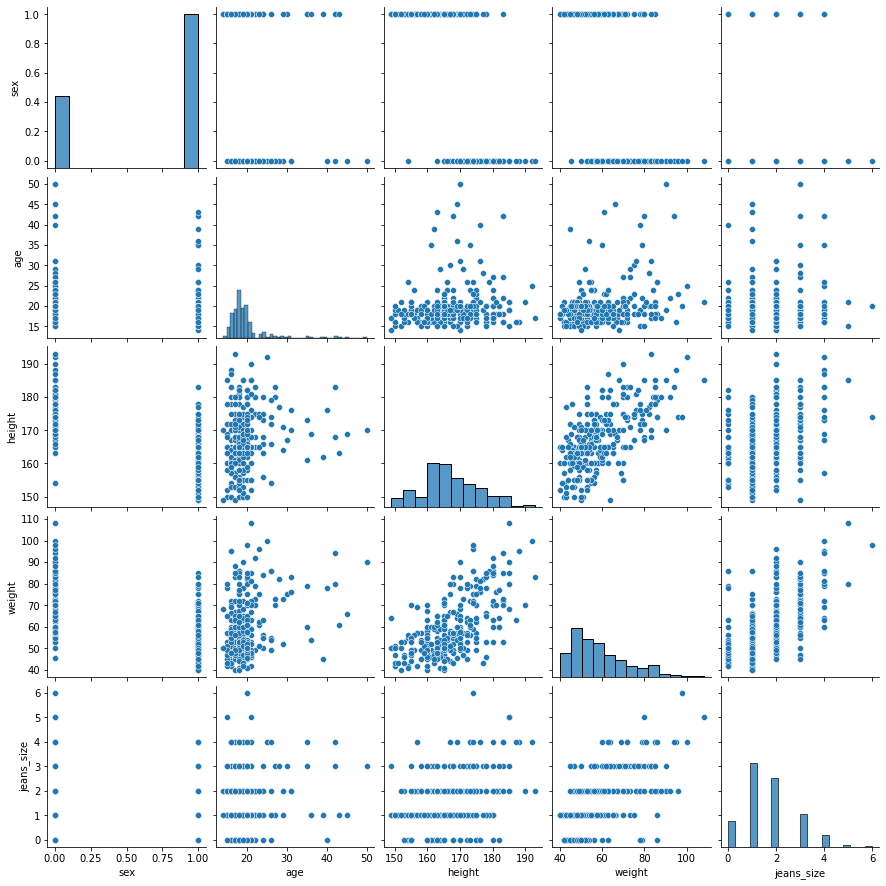

In [15]:
sns.pairplot(viz_data)

In [16]:
X = data[['sex', 'age', 'height', 'weight']]
y = data['jeans_size'].map(jeans_sizes)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [20]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', LogisticRegression())])

In [21]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100)], 
        'model__max_iter': [700]
    }
]

In [22]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(transformers=[('label_encoding',
                                                                         OneHotEncoder(),
                                                                         ['sex']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'height',
                                                                          'weight'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 

In [23]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
13       0.080709      0.016384         0.004312        0.000933   
18       0.079146      0.011300         0.004323        0.000444   
17       0.082534      0.010569         0.004464        0.000491   
16       0.080388      0.009404         0.004325        0.000686   
15       0.082151      0.007591         0.004842        0.000819   

   param_model__C param_model__max_iter  \
13             14                   700   
18             19                   700   
17             18                   700   
16             17                   700   
15             16                   700   

                                      params  split0_test_score  \
13  {'model__C': 14, 'model__max_iter': 700}           0.608696   
18  {'model__C': 19, 'model__max_iter': 700}           0.608696   
17  {'model__C': 18, 'model__max_iter': 700}           0.608696   
16  {'model__C': 17, 'model__max_iter': 700}           0.608696   
15  {'model__C': 16, 'model__max_iter': 700}           0.608696   

    split1_test_score  split2_test_score  split3_test_score  \
13           0.478261           0.434783           0.608696   
18           0.478261           0.434783           0.608696   
17           0.478261           0.434783           0.608696   
16           0.478261           0.434783           0.608696   
15           0.478261           0.434783           0.608696   

    split4_test_score  split5_test_score  split6_test_score  \
13           0.521739           0.304348           0.391304   
18           0.521739           0.304348           0.391304   
17           0.521739           0.304348           0.391304   
16           0.521739           0.304348           0.391304   
15           0.521739           0.304348           0.391304   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
13           0.565217                0.5           0.590909         0.500395   
18           0.565217                0.5           0.590909         0.500395   
17           0.565217                0.5           0.590909         0.500395   
16           0.565217                0.5           0.590909         0.500395   
15           0.565217                0.5           0.590909         0.500395   

    std_test_score  rank_test_score  
13        0.095624                1  
18        0.095624                1  
17        0.095624                1  
16        0.095624                1  
15        0.095624                1

In [24]:
best_log_reg = grid_search.best_estimator_
best_log_reg.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', LogisticRegression(C=13, max_iter=700))])

In [25]:
y_pred = best_log_reg.predict(X_test)
y_pred

array([2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 2, 4,
       2, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1], dtype=int64)

In [26]:
y_test.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [27]:
x_axis = np.unique(np.concatenate([y_pred, y_test]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

In [28]:
accuracy_score(y_test, y_pred)

0.41379310344827586

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

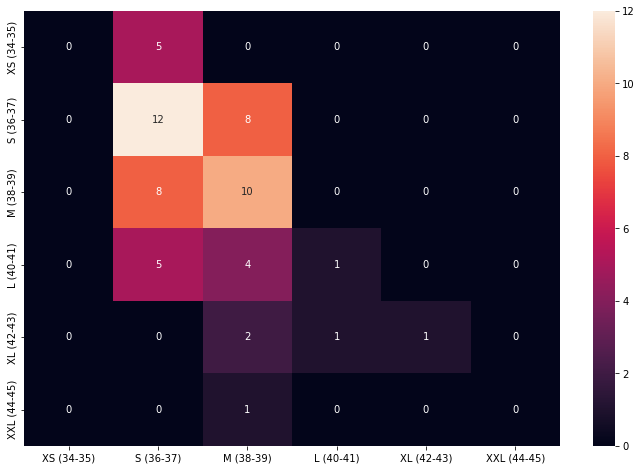

In [29]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [30]:
best_log_reg.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', LogisticRegression(C=13, max_iter=700))])

In [31]:
with open('..\models\jeans_size_pred_models\logistic_regression.pkl', 'wb') as f:
    pickle.dump(best_log_reg, f)

Without Age feature

In [32]:
data_without_age = data.drop(['age'], axis=1)
data_without_age.head()

sex  height  weight  jeans_size
1  Իգական   165.0    55.0   M (38-39)
2  Իգական   154.0    42.0  XS (34-35)
3  Իգական   167.0    56.0   M (38-39)
4  Իգական   165.0    70.0   L (40-41)
5  Արական   183.0    72.0  XL (42-43)

In [33]:
X_wa = data_without_age[['sex', 'height', 'weight']]
y_wa = data_without_age['jeans_size'].map(jeans_sizes)

In [34]:
X_train_wa, X_test_wa, y_train_wa, y_test_wa = train_test_split(X_wa, y_wa, train_size=0.8, random_state=42)

In [35]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [36]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', LogisticRegression())])

In [37]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100)], 
        'model__max_iter': [700]
    }
]

In [38]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_wa, y_train_wa)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(transformers=[('label_encoding',
                                                                         OneHotEncoder(),
                                                                         ['sex']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['height',
                                                                          'weight'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ..

In [39]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.039272      0.009771         0.004198        0.000397   
2        0.049553      0.006317         0.004461        0.000744   
8        0.063453      0.008990         0.004222        0.000398   
14       0.075805      0.011711         0.004002        0.000434   
13       0.075704      0.009567         0.004492        0.000615   

   param_model__C param_model__max_iter  \
0               1                   700   
2               3                   700   
8               9                   700   
14             15                   700   
13             14                   700   

                                      params  split0_test_score  \
0    {'model__C': 1, 'model__max_iter': 700}           0.521739   
2    {'model__C': 3, 'model__max_iter': 700}           0.521739   
8    {'model__C': 9, 'model__max_iter': 700}           0.521739   
14  {'model__C': 15, 'model__max_iter': 700}           0.521739   
13  {'model__C': 14, 'model__max_iter': 700}           0.521739   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.478261           0.478261           0.521739   
2            0.478261           0.478261           0.521739   
8            0.478261           0.478261           0.521739   
14           0.478261           0.478261           0.521739   
13           0.478261           0.478261           0.521739   

    split4_test_score  split5_test_score  split6_test_score  \
0            0.434783           0.478261           0.391304   
2            0.478261           0.391304           0.391304   
8            0.434783           0.391304           0.391304   
14           0.434783           0.391304           0.391304   
13           0.434783           0.391304           0.391304   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0            0.521739                0.5           0.545455         0.487154   
2            0.478261                0.5           0.590909         0.483004   
8            0.478261                0.5           0.590909         0.478656   
14           0.478261                0.5           0.590909         0.478656   
13           0.478261                0.5           0.590909         0.478656   

    std_test_score  rank_test_score  
0         0.043954                1  
2         0.056428                2  
8         0.058271                3  
14        0.058271                3  
13        0.058271                3

In [40]:
best_log_reg_without_age_feature = grid_search.best_estimator_
best_log_reg_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', LogisticRegression(C=1, max_iter=700))])

In [41]:
y_pred = best_log_reg_without_age_feature.predict(X_test_wa)
y_pred

array([2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 1, 4,
       2, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1], dtype=int64)

In [42]:
y_test_wa.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [43]:
x_axis = np.unique(np.concatenate([y_pred, y_test_wa]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

In [44]:
accuracy_score(y_test_wa, y_pred)

0.3620689655172414

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

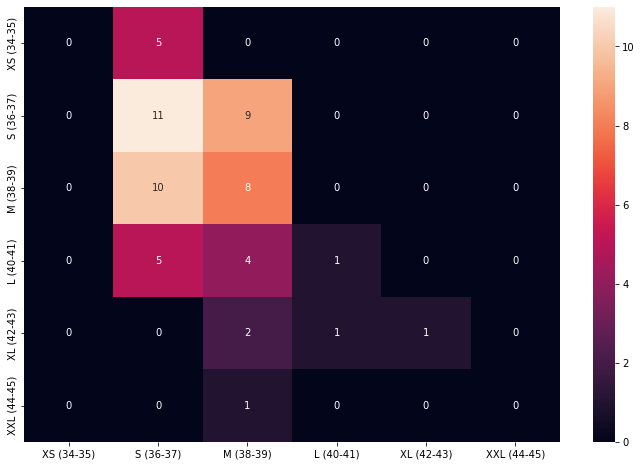

In [45]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [46]:
best_log_reg_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', LogisticRegression(C=1, max_iter=700))])

In [47]:
with open('..\models\jeans_size_pred_models\logistic_regression_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_log_reg_without_age_feature, f)

Without Sex feature

In [48]:
data_without_sex = data.drop(['sex'], axis=1)
data_without_sex.head()

age  height  weight  jeans_size
1  16.0   165.0    55.0   M (38-39)
2  16.0   154.0    42.0  XS (34-35)
3  17.0   167.0    56.0   M (38-39)
4  18.0   165.0    70.0   L (40-41)
5  16.0   183.0    72.0  XL (42-43)

In [49]:
X_ws = data_without_sex[['age', 'height', 'weight']]
y_ws = data_without_sex['jeans_size'].map(jeans_sizes)

In [50]:
X_train_ws, X_test_ws, y_train_ws, y_test_ws = train_test_split(X_ws, y_ws, train_size=0.8, random_state=42)

In [51]:
pipeline = Pipeline([('standard_scaler', StandardScaler()),
                     ('model', LogisticRegression())])

In [52]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100)], 
        'model__max_iter': [700]
    }
]

In [53]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_ws, y_train_ws)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'model__max_iter': [700]}],
             scoring='accuracy')

In [54]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
4       0.036268      0.006557         0.001755        0.000409   
1       0.030144      0.005230         0.001998        0.000894   
0       0.028948      0.006772         0.002015        0.000462   
5       0.038287      0.007095         0.001880        0.000261   
6       0.042702      0.009432         0.001847        0.000214   

  param_model__C param_model__max_iter  \
4              5                   700   
1              2                   700   
0              1                   700   
5              6                   700   
6              7                   700   

                                    params  split0_test_score  \
4  {'model__C': 5, 'model__max_iter': 700}           0.608696   
1  {'model__C': 2, 'model__max_iter': 700}           0.652174   
0  {'model__C': 1, 'model__max_iter': 700}           0.652174   
5  {'model__C': 6, 'model__max_iter': 700}           0.565217   
6  {'model__C': 7, 'model__max_iter': 700}           0.565217   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
4           0.434783           0.521739           0.608696           0.565217   
1           0.434783           0.478261           0.565217           0.565217   
0           0.434783           0.521739           0.565217           0.565217   
5           0.434783           0.521739           0.608696           0.565217   
6           0.434783           0.521739           0.608696           0.565217   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
4            0.26087           0.391304           0.521739           0.590909   
1            0.26087           0.391304           0.565217           0.590909   
0            0.26087           0.391304           0.565217           0.545455   
5            0.26087           0.391304           0.521739           0.590909   
6            0.26087           0.391304           0.521739           0.590909   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
4           0.590909         0.509486        0.108494                1  
1           0.590909         0.509486        0.111924                1  
0           0.590909         0.509289        0.109137                3  
5           0.590909         0.505138        0.105253                4  
6           0.590909         0.505138        0.105253                4

In [55]:
best_log_reg_without_gender_feature = grid_search.best_estimator_
best_log_reg_without_gender_feature.fit(X_train_ws, y_train_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', LogisticRegression(C=2, max_iter=700))])

In [56]:
y_pred = best_log_reg_without_gender_feature.predict(X_test_ws)
y_pred

array([2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 2, 4,
       2, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1], dtype=int64)

In [57]:
y_test_ws.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [58]:
accuracy_score(y_test_ws, y_pred)

0.43103448275862066

In [59]:
x_axis = np.unique(np.concatenate([y_pred, y_test_ws]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

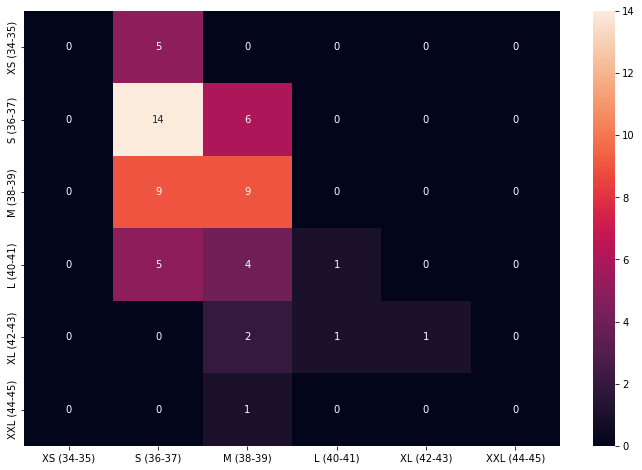

In [60]:
conf_m = confusion_matrix(y_test_ws, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [61]:
best_log_reg_without_gender_feature.fit(X_ws, y_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', LogisticRegression(C=2, max_iter=700))])

In [62]:
with open('..\models\jeans_size_pred_models\logistic_regression_without_gender_feature.pkl', 'wb') as f:
    pickle.dump(best_log_reg_without_gender_feature, f)

Logistic Regression results.
<br>
with all features = 47.0% accuracy score, std = 10% 
<br>
without age feature = 46.3% accuracy score, std = 7%
<br>
without sex seature = 47.4% accuracy score, std = 9%

# Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [64]:
X_train_viz = X_train.copy()
label_encoder = LabelEncoder()
X_train_viz['sex'] = label_encoder.fit_transform(X_train['sex'])

In [65]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train_viz, y_train)

DecisionTreeClassifier(max_depth=3)

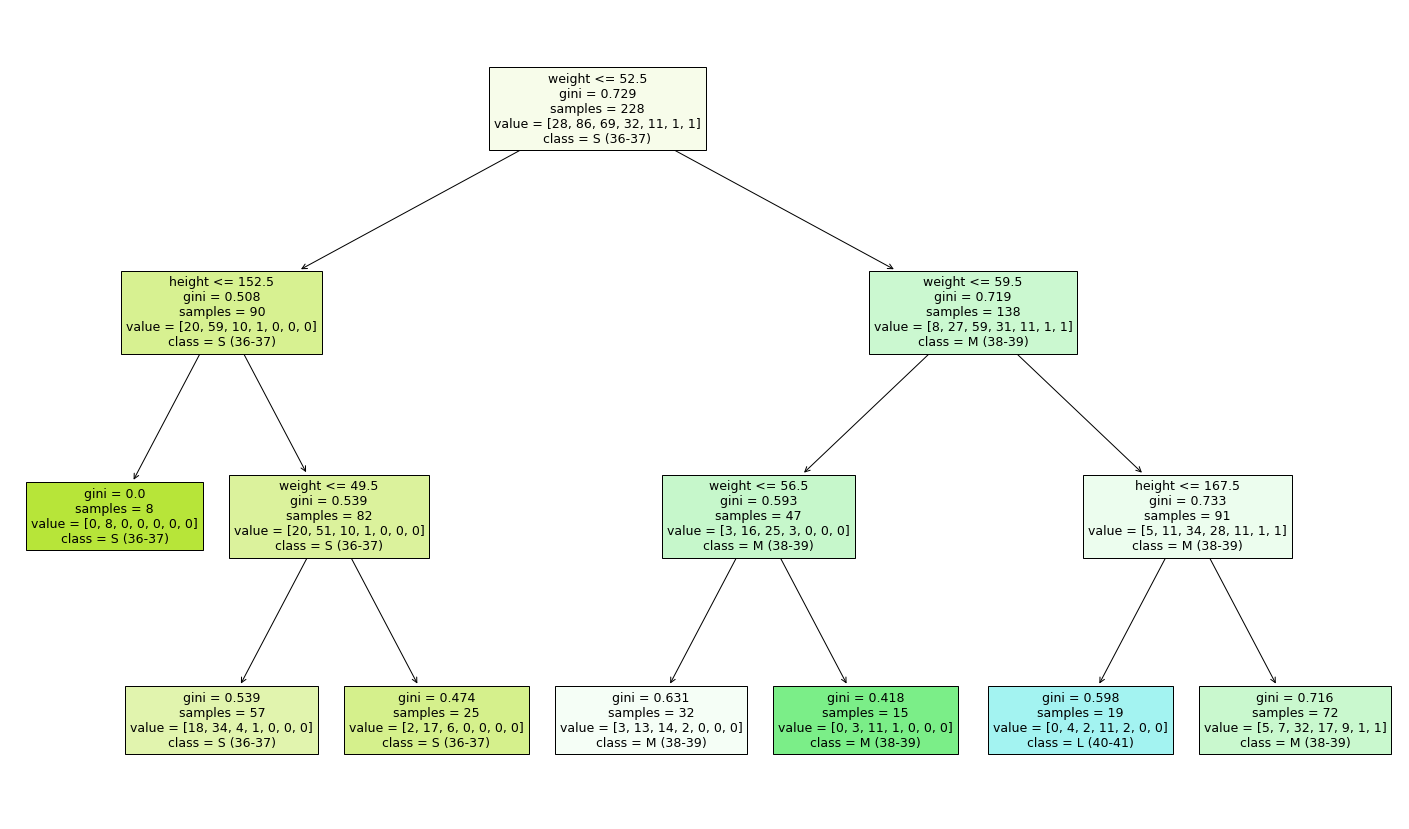

In [66]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree, 
          class_names=[j_sizes[i] for i in decision_tree.classes_],
          feature_names=X_train_viz.columns,
          filled=True)
plt.savefig(r'..\plots\jeans_size_tree_max_depth_3.pdf', format='pdf', bbox_inches = "tight")

In [67]:
param_grid = [
    {
        'model__max_depth': [i for i in range(1, 12)],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [i for i in range(2, 40)],
        'model__min_samples_leaf': [i for i in range(1, 25)],   
    }
]

In [68]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight']),])

In [69]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', DecisionTreeClassifier())])

In [70]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=11, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, mo

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split

[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=15, model__min_samples_split=7;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=15, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=15, model__min_samples_split=7;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=15, model__min_samples_split=7;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=15, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=15, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=15, model__min_samples_split=7;, score=0.522 tota

[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=24, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=24, model__min_samples_split=38;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=24, model__min_samples_split=38;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=13;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=13;, sco

[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=39;, sc

[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=12;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=12;, score=0.5

[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=35;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=35;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=39;, 

[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.

[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=24, model__min_samples

[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=26;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=26;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=36;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=

[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=37;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=37;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=

[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=

[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=12;, score

[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.318 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.478 tot

[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=21;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=21;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=21;, s

[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=35;, sc

[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=32;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=32;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=32;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_

[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=23;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=23;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=19, model__min_sample

[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=19;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=19;, score=0.

[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.304 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.500 tota

[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=17;, score=0.435 tota

[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=15, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=15, model__min_samples_split=38;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=15, model__min_samples_split=38;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_s

[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=18;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=18;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=18;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__min_samples_split=2

[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.5

[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=19;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.

[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=13;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=13;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=13;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=17;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=17;, sc

[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=31;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=31;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=31;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=31;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=28;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=28;, score

[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=5;, score=0.364 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=5;, s

[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=8;, score=0.304 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=8;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=8;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split

[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=34;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=34;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=34;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_s

[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=10;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=10;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_s

[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=17;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split

[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=7;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=7;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=7;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_spli

[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=23;, score=0.304 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=23;, score=0.5

[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=4;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=37;

[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=9;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=9;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=9;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=7;, score=0.435 total

[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=10;, score=0.217 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=10;, score=0.304 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=10;, score=0.4

[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=9;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=9;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=9;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split

[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__min_samples_split=28;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=6, model__min_samples_split=28;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=32;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=32;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=32;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=32;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=

[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=6;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=6;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=6;, 

[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=25;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=25;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_sample

[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=33;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_sp

[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=18, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=18, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=18, model__min_samples_split=39;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=18, model__min_samples_split=39;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=24;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=24;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_s

[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=3;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=3;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split

[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=18;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=18;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=18;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=18;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=18;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=18;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples

[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=17;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=17;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=28;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=28;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=3, model__min_samples_split=28;, score=0.391 t

[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=4;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_spli

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.500 total time=

[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=22;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=22;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=

[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=31;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=31;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=36;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=36;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=23, model__min_samples_split=36;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=23, model__min_sampl

[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=11;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=7;, score=0.391 total ti

[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=15;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=15;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=8;, score=0.47

[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=17;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=17;,

[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=31;, sco

[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=10;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=10;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=10;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=39;, sco

[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_spl

[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=33;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=33;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=33;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=33;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_s

[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=38;, score=0.545 tota

[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=21;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=21;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=17;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=17;, 

[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=2

[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=35;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=35;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=13;

[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=10;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=10;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_s

[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=

[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=29;, score=0.4

[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=8;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=8;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=8;, scor

[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=23;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=23;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=8;, score=0.478 tota

[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split

[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=34;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=34;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=14;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=14;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_sample

[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.273 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=23;

[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=31;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=31;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=31;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=31;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samp

[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.261 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.174 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=7;, score=0.391 tota

[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=2;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=19, model__min_samples_split=6;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=19, model__min_samples_split=6;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=19, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=19, model__min_samples_split=6;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=19, model__min_samples_split=6;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=19, model__min_samples_split=6;, score=0.391 tota

[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples

[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=11;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=

[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.545 tota

[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples

[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=22, model__min_samples_split=5;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=22, model__min_samples_split=5;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=35;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=24, model__min_samples_

[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=37;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=37;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=18, model__min_sam

[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=9;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=4;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=4;, score=0.522 to

[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=38;, score=0.522 total

[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=17;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=17;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=20;, score=0.3

[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=10;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=10;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.609 

[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.591 total time=

[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=500,
  

In [71]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
163       0.008786      0.001534         0.005042        0.001123   
123       0.008348      0.000766         0.004709        0.000837   
486       0.008490      0.001555         0.004076        0.000290   
41        0.008318      0.001260         0.004535        0.000539   
80        0.008648      0.001563         0.004436        0.000645   

    param_model__min_samples_split param_model__min_samples_leaf  \
163                             10                            24   
123                             26                            24   
486                             36                            24   
41                              36                            23   
80                              21                            23   

    param_model__max_depth param_model__criterion  \
163                      7                   gini   
123                      9                   gini   
486                      4                   gini   
41                       4                   gini   
80                      10                   gini   

                                                params  split0_test_score  \
163  {'model__min_samples_split': 10, 'model__min_s...           0.565217   
123  {'model__min_samples_split': 26, 'model__min_s...           0.565217   
486  {'model__min_samples_split': 36, 'model__min_s...           0.565217   
41   {'model__min_samples_split': 36, 'model__min_s...           0.565217   
80   {'model__min_samples_split': 21, 'model__min_s...           0.565217   

     ...  split3_test_score  split4_test_score  split5_test_score  \
163  ...           0.521739           0.608696           0.478261   
123  ...           0.521739           0.608696           0.478261   
486  ...           0.521739           0.608696           0.478261   
41   ...           0.521739           0.608696           0.478261   
80   ...           0.521739           0.608696           0.478261   

     split6_test_score  split7_test_score  split8_test_score  \
163           0.391304           0.565217           0.590909   
123           0.391304           0.565217           0.590909   
486           0.391304           0.565217           0.590909   
41            0.434783           0.521739           0.590909   
80            0.434783           0.521739           0.590909   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
163                0.5         0.526482        0.059395                1  
123                0.5         0.526482        0.059395                1  
486                0.5         0.526482        0.059395                1  
41                 0.5         0.522134        0.051039                4  
80                 0.5         0.522134        0.051039                4  

[5 rows x 22 columns]

In [72]:
best_tree = rand_search.best_estimator_
best_tree.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=9, min_samples_leaf=24,
                                        min_samples_split=26))])

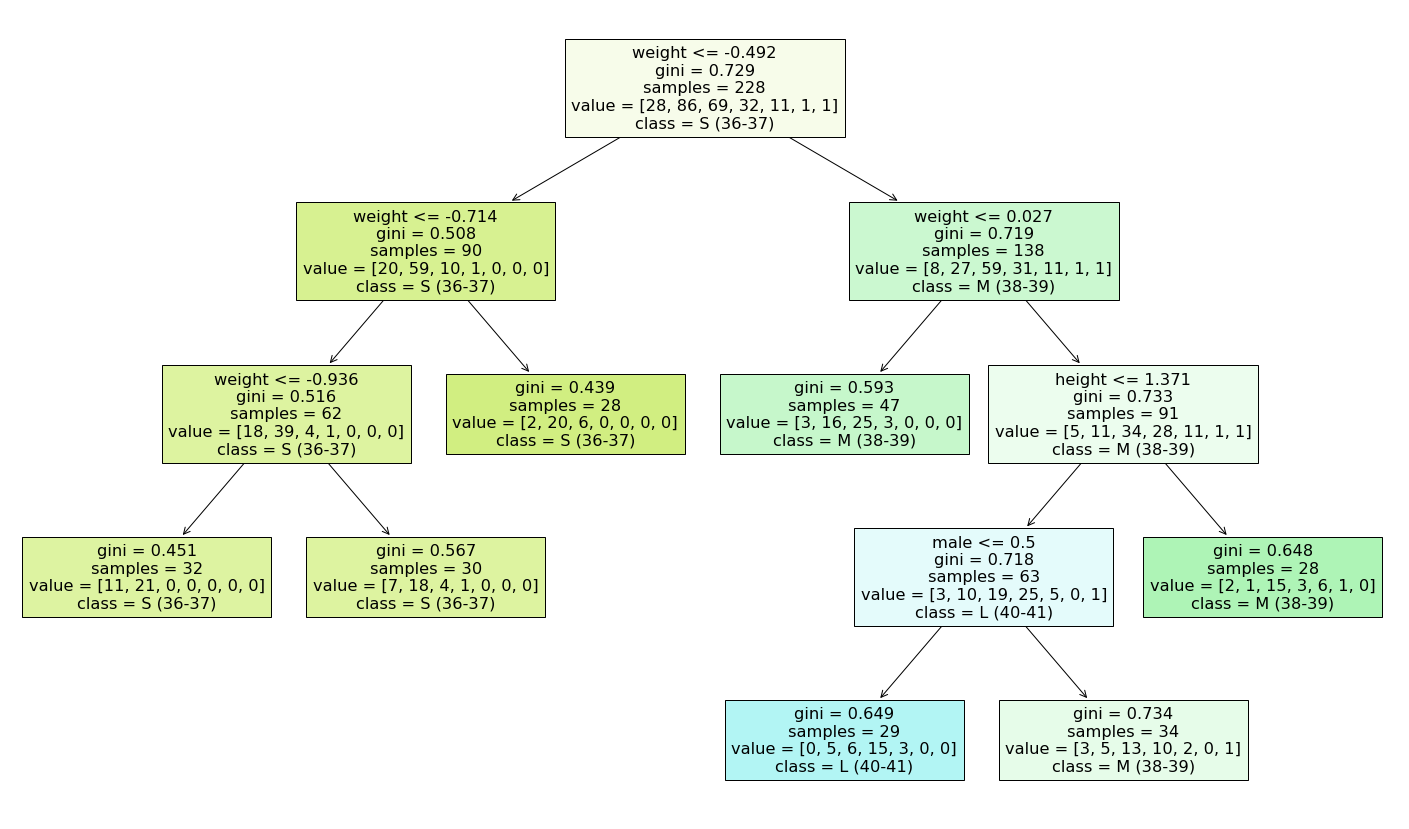

In [73]:
plt.figure(figsize=(25, 15))
plot_tree(best_tree.named_steps.model, 
          filled=True, 
          class_names=[j_sizes[i] for i in best_tree.named_steps.model.classes_],
          feature_names=['male', 'female', 'age', 'height', 'weight'])
plt.savefig(r'..\plots\jeans_size_best_tree.pdf', format='pdf', bbox_inches = "tight")

In [74]:
y_pred = best_tree.predict(X_test)
y_pred

array([2, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 3, 2,
       2, 1, 2, 1, 3, 2, 2, 1, 1, 2, 1, 3, 2, 1, 1, 3, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 1, 2, 3, 2, 3, 1, 2, 2, 2, 2, 1], dtype=int64)

In [75]:
y_test.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [76]:
accuracy_score(y_test, y_pred)

0.3793103448275862

In [77]:
x_axis = np.unique(np.concatenate([y_pred, y_test]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

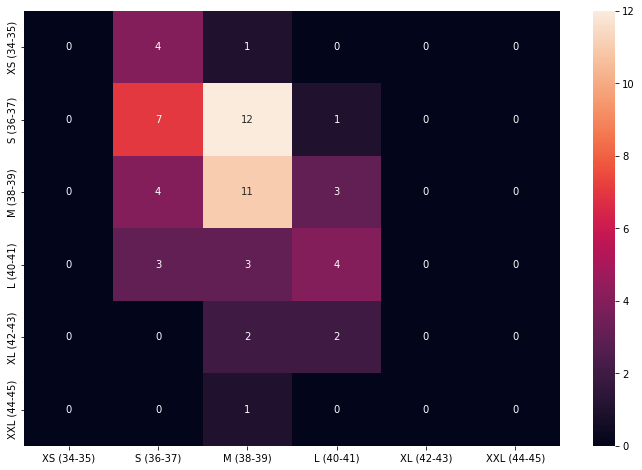

In [78]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [79]:
best_tree.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=9, min_samples_leaf=24,
                                        min_samples_split=26))])

In [80]:
with open('..\models\jeans_size_pred_models\decision_tree_classifier.pkl', 'wb') as f:
    pickle.dump(best_tree, f)

Without Age feature

In [81]:
X_train_viz = X_train_wa.copy()
label_encoder = LabelEncoder()
X_train_viz['sex'] = label_encoder.fit_transform(X_train_wa['sex'])

In [82]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train_viz, y_train_wa)

DecisionTreeClassifier(max_depth=3)

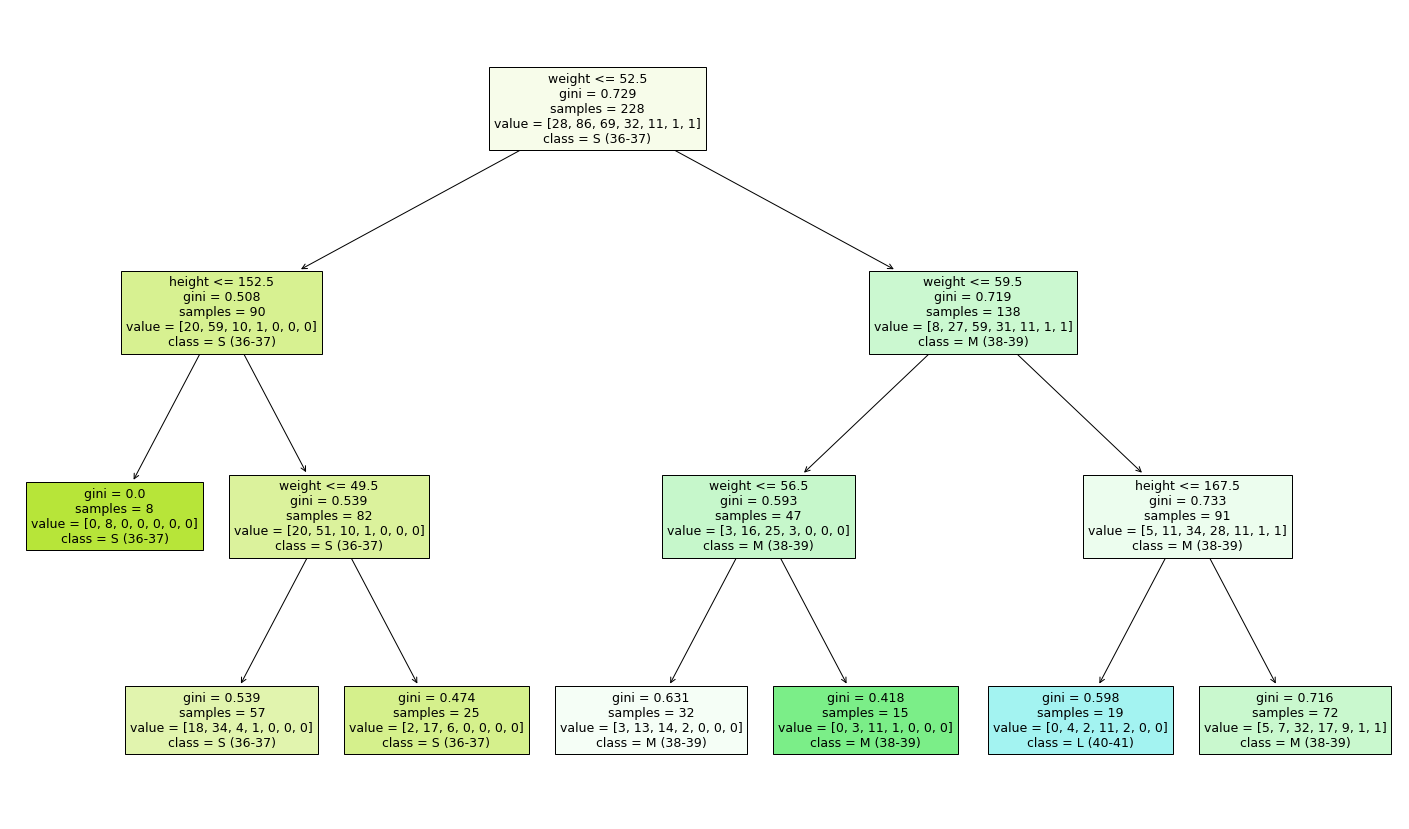

In [83]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree, 
          class_names=[j_sizes[i] for i in decision_tree.classes_],
          feature_names=X_train_viz.columns,
          filled=True)
plt.savefig(r'..\plots\jeans_size_tree_max_depth_3_without_age_feature.pdf', format='pdf', bbox_inches = "tight")

In [84]:
param_grid = [
    {
        'model__max_depth': [i for i in range(1, 12)],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [i for i in range(2, 40)],
        'model__min_samples_leaf': [i for i in range(1, 25)],   
    }
]

In [85]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [86]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', DecisionTreeClassifier())])

In [87]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_wa, y_train_wa)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=3;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_sam

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.5

[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=13;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=13;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.5

[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=9;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=9;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=8;,

[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=2;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=2;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=5, model__min_samples_split=17;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=5, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=5, model__min_samples_split

[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=28;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=28;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=24;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=24;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=24

[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=11;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=11;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=4;, sc

[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=16;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=16;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=12, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=12, model__min_sample

[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=

[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=16, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=16, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=16, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=16, model__min_samples_split=22;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=16, model__min_samples_split=22;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=20;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=20;, sc

[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=

[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=11;, score=0.364 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=11;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split

[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=28;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=28;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=16, model__min_sam

[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=26;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=26;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=26;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=19;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=19;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=1

[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=24;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=24;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=24;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=24;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_sample

[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min

[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=19;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=19;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=13;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=8, model__min_samples_split=13;, score=0.4

[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=18;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=18;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=18;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.522 tot

[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=

[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples

[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=22;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=22;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=22;, s

[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=34;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=3

[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=15;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=15;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=15;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=6, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=6, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=6, model__min_samples_split=39;, score=0.

[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=18, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=18, model__min_samples_split=31;

[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=36;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=8, model__min_samples_split=36;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=37;, score=

[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=32;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=32;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=32;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=13, model__min_samples_split=14;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=13, model__min_samples_split=14;, sc

[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=3;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=3;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=3;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split

[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.5

[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=27;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=4;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_sampl

[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=2;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=2;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=26;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=26;, score=0

[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=12, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=12, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=12, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=12, model__min_samples_split=16;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=12, model__min_samples_split=16;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=17, model__min_samp

[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=20;, score=0.565 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=20;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=20;, score=0.364 tot

[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=6;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=6;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=6;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split

[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=17;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=17;, scor

[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=14;, score=0

[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=31;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=31;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=31;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=31;, sco

[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=18, model__min_samples_split=30;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=18, model__min_samples_split=30;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_sampl

[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=8;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=14;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_spl

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.545 tota

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=12, model__min_samples_split=5;, score=0.591 tota

[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=2, model__min_samples

[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=2;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=2;, score=0.565 tota

[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples

[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=13;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=13;, score=0.3

[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=

[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.4

[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=38;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=38;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_sample

[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=16, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=16, model__min_samples_split=29;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=16, model__min_samples_split=29;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=3;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=3;,

[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=36;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=36;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_sp

[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=21, model__min_samples_spli

[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=16, model__min_samples_split=21;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=10;, score=0.304 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=10;, score=0.478

[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=25;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=25;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=

[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=31;, score=0.545 tota

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.591 tota

[CV 2/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.4

[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=10;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples

[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=10, model__min_samples

[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=9;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=3;, score=0.5

[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.364 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=9;, 

[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples

[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=6, model__min_samples_split=26;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=6, model__min_samples_split=26;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_s

[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=7;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=7;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=15;, scor

[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=19;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=19;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=4;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples

[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=10, model__min_samples_split=37;, sc

[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=18;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=18;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=18;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=18;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=18;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=

[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=33;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=15, model__min_samp

[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=4;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=4;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=5;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=5;, sco

[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=12;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=12;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=39;, sco

[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=18, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=18, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=18, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=18, model__min_samples_split=17;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=18, model__min_samples_split=17;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=27;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_sam

[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=23;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split

[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples

[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=6;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=6;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=6;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_spli

[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=31;, score=0.5

[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=14, model__min_samples_split=24;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=14, model__min_samples_split=24;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=30;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_spl

[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=10;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=10;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=4;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=4;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=4;

[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=20;, score=

[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=9;, score=0.348 total time=

[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_sp

[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=28;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=28;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=5, model__min_samples_split=30;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=5, model__min_samples_split=30;, 

[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.522 tota

[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=8;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=8;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=8;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=29;, score=0.4

[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=32;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=32;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=32;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=32;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=21, model__min_samples_split=32;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=24;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=11, model__min_samples_split=24;, score=0.

[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=

[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=28;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=28;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=5, model__min_samples_sp

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=500,
                   param_distributions=[{'model__criterion': ['gini',
                   

In [88]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
207       0.008233      0.000955         0.004048        0.000713   
4         0.008499      0.001156         0.004201        0.000626   
196       0.008062      0.001271         0.004099        0.000936   
122       0.007374      0.000406         0.003891        0.000484   
117       0.008345      0.001131         0.004214        0.000966   

    param_model__min_samples_split param_model__min_samples_leaf  \
207                             37                            24   
4                               10                            24   
196                             29                            24   
122                             34                            24   
117                             22                            24   

    param_model__max_depth param_model__criterion  \
207                      4                   gini   
4                        5                   gini   
196                      7                   gini   
122                      7                   gini   
117                     10                   gini   

                                                params  split0_test_score  \
207  {'model__min_samples_split': 37, 'model__min_s...           0.565217   
4    {'model__min_samples_split': 10, 'model__min_s...           0.565217   
196  {'model__min_samples_split': 29, 'model__min_s...           0.565217   
122  {'model__min_samples_split': 34, 'model__min_s...           0.565217   
117  {'model__min_samples_split': 22, 'model__min_s...           0.565217   

     ...  split3_test_score  split4_test_score  split5_test_score  \
207  ...           0.521739           0.608696           0.478261   
4    ...           0.521739           0.608696           0.478261   
196  ...           0.521739           0.608696           0.478261   
122  ...           0.521739           0.608696           0.478261   
117  ...           0.521739           0.608696           0.478261   

     split6_test_score  split7_test_score  split8_test_score  \
207           0.391304           0.565217           0.590909   
4             0.391304           0.565217           0.590909   
196           0.391304           0.565217           0.590909   
122           0.391304           0.565217           0.590909   
117           0.391304           0.565217           0.590909   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
207                0.5         0.526482        0.059395                1  
4                  0.5         0.526482        0.059395                1  
196                0.5         0.526482        0.059395                1  
122                0.5         0.526482        0.059395                1  
117                0.5         0.526482        0.059395                1  

[5 rows x 22 columns]

In [89]:
best_tree_without_age_feature = rand_search.best_estimator_
best_tree_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=24,
                                        min_samples_split=10))])

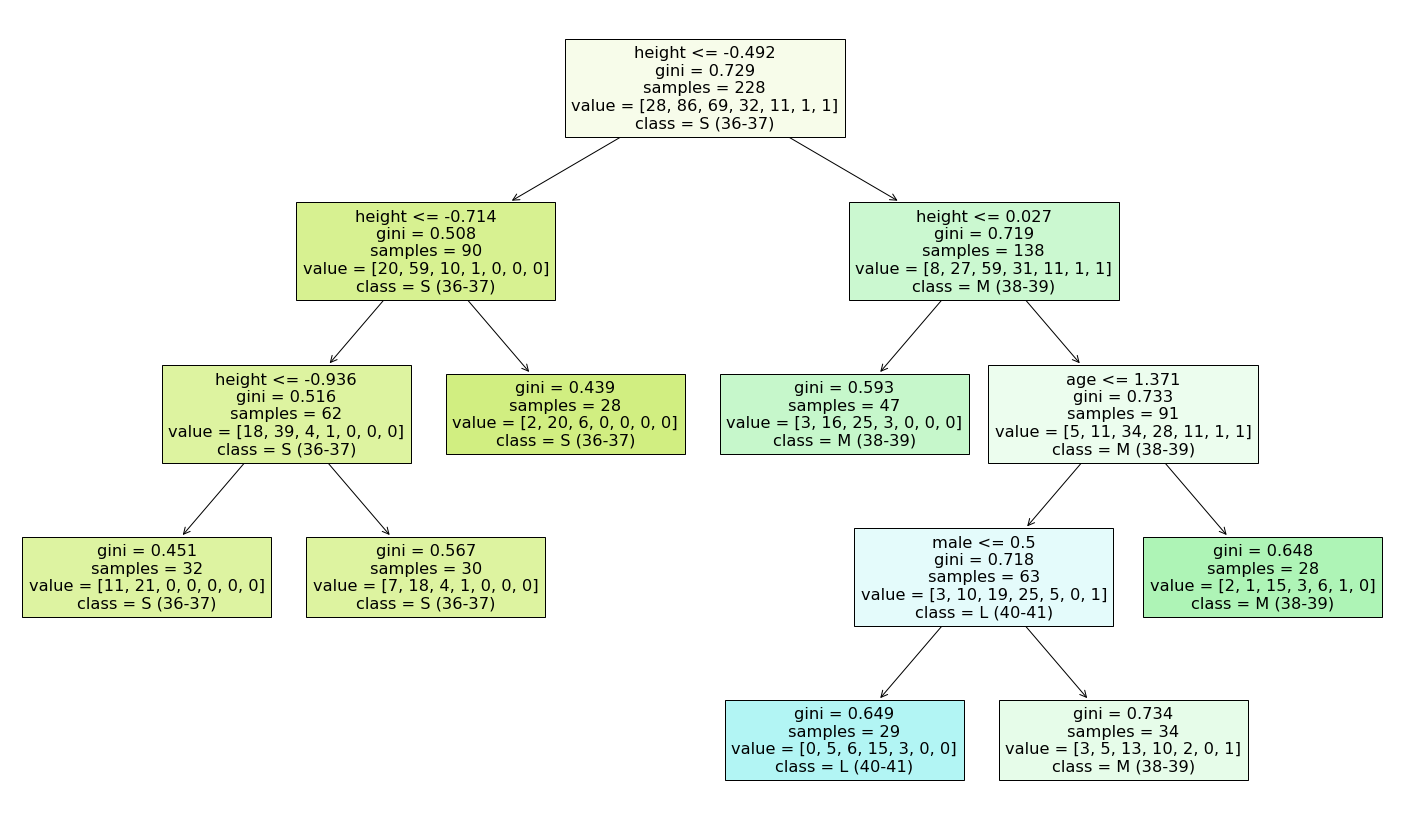

In [90]:
plt.figure(figsize=(25, 15))
plot_tree(best_tree_without_age_feature.named_steps.model, 
          filled=True, 
          class_names=[j_sizes[i] for i in best_tree_without_age_feature.named_steps.model.classes_],
          feature_names=['male', 'female', 'age', 'height', 'weight'])
plt.savefig(r'..\plots\jeans_size_best_tree_without_age_feature.pdf', format='pdf', bbox_inches = "tight")

In [91]:
y_pred = best_tree_without_age_feature.predict(X_test_wa)
y_pred

array([2, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 3, 2, 2, 1, 3, 2, 3, 2,
       2, 1, 2, 1, 3, 2, 2, 1, 1, 2, 1, 3, 2, 1, 1, 3, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 1, 2, 3, 2, 3, 1, 2, 2, 2, 2, 1], dtype=int64)

In [92]:
y_test_wa.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [93]:
accuracy_score(y_test_wa, y_pred)

0.3793103448275862

In [94]:
x_axis = np.unique(np.concatenate([y_pred, y_test_wa]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

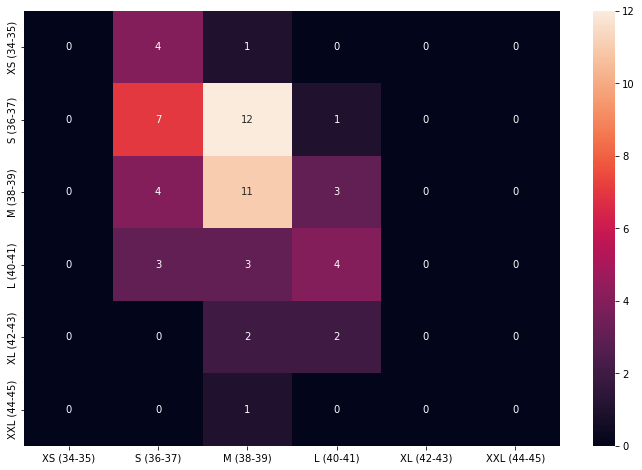

In [95]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [96]:
best_tree_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=24,
                                        min_samples_split=10))])

In [97]:
with open('..\models\jeans_size_pred_models\decision_tree_classifier_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_tree_without_age_feature, f)

Without Sex feature

In [98]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train_ws, y_train_ws)

DecisionTreeClassifier(max_depth=3)

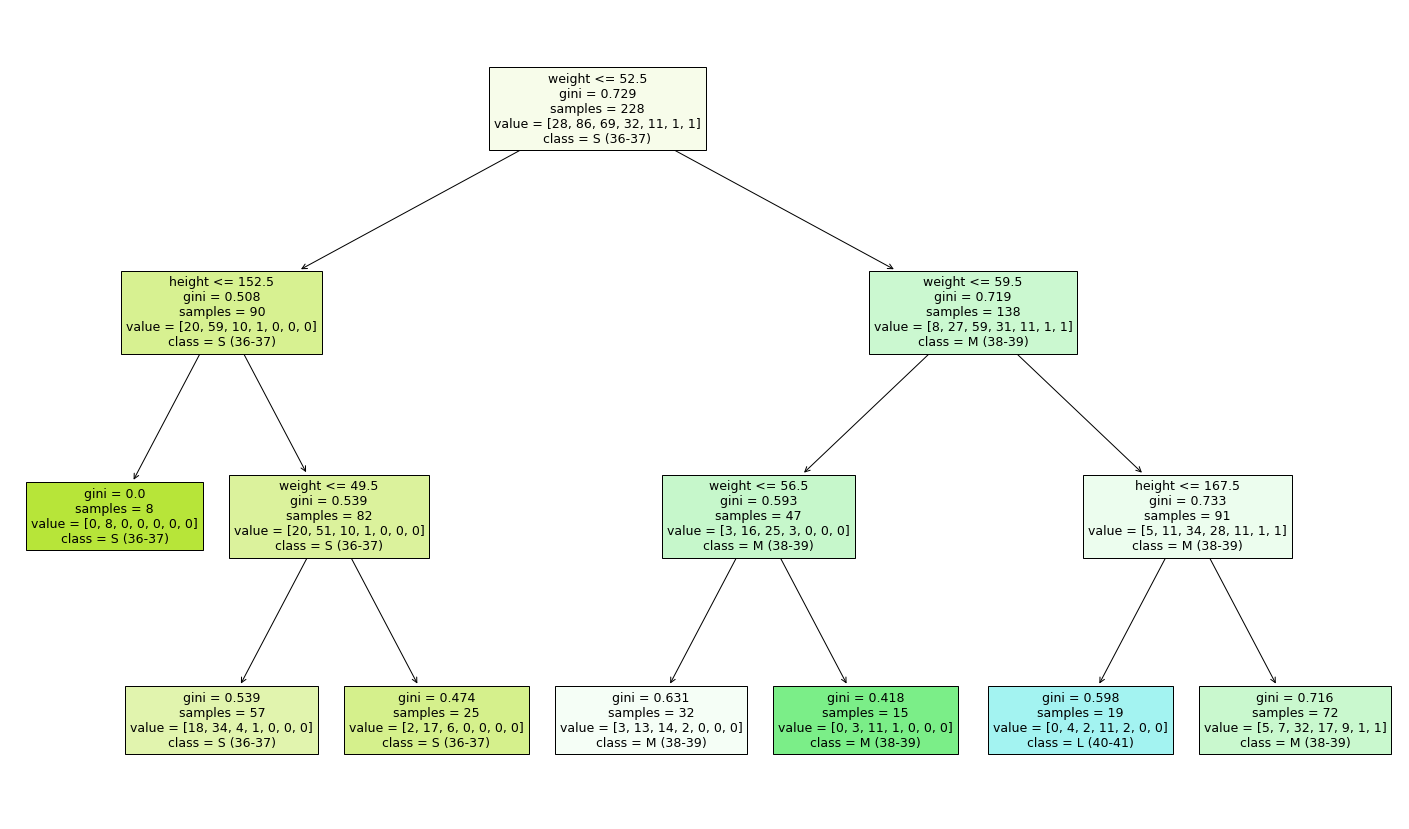

In [99]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree, 
          class_names=[j_sizes[i] for i in decision_tree.classes_],
          feature_names=X_train_viz.columns,
          filled=True)
plt.savefig(r'..\plots\jeans_size_tree_max_depth_3_without_gender_feature.pdf', format='pdf', bbox_inches = "tight")

In [100]:
param_grid = [
    {
        'model__max_depth': [i for i in range(1, 12)],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [i for i in range(2, 40)],
        'model__min_samples_leaf': [i for i in range(1, 25)],   
    }
]

In [101]:
pipeline = Pipeline([('standard_scaler', StandardScaler()),
                     ('model', DecisionTreeClassifier())])

In [102]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_ws, y_train_ws)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=4, model__min_samples_split=

[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=35;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=4, model__min_samples_split=35;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=32;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=20, model__min_samples_split=32;, scor

[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.348

[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=37;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_sample

[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=16;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=16;, score=0.273 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=1

[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=7;, score=0.261 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=7;, score=0.565 tota

[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.5

[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=14;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=14;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split

[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=

[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=21;, score=0.304 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=21;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=21;, score=0.5

[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_sp

[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=14;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=14;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=14;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=2

[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=15, model__min_samples_split=28;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=15, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=15, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=15, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=15, model__min_sample

[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=3;, score=0.565 to

[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_split=11;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_split=11;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=10;, sc

[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=35;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=18, model__min_samples_split=35;, score=0.

[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=11, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=11, model__min_samples_split=11;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=11, model__min_samples_split=11;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=30;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=3

[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=33;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=33;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=33;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=33;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=33;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=6, model__min_samples_split=33;, score=0.391 tota

[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=22;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=22;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=21;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=

[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=23, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=23, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=23, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=23, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=23, model__min_samples_split=22;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=23, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=23, model__min_samples_split=22;, score=0.3

[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=10;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=14, model__min_samples_split=10;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=14, model__min_sample

[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=7, model__min_samples_split=18;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=7, model__min_samples_split=18;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=7, model__min_samples_split=18;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=7, model__min_samples_split=18;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=37;, score=0.304 tot

[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=6;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=16, model__min_sample

[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=35;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=25;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=25;, score=0.

[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=35;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=35;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=35;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_

[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=

[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=10;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=10;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=15, model__min_samples_split=10;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=11;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=11;, score=0.

[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=10;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=10;, sc

[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=24, model__min_samples_split=2;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=24, model__min_sampl

[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=36;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=36;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=37;, s

[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=13;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=13;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=13;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=34;, score=0.43

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.545 tota

[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=17;, score=0.304 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=

[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=15;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_sample

[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=21, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=21, model__min_samples_split=29;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=21, model__min_samples_split=29;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=33;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=33;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=3

[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=30;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=30;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_sample

[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=25;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_spli

[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=33;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=33;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=33;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=33;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=33;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_

[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=30;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=30;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=30;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=30;, score=0.522 

[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=6;, score=0.261 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=6;, sc

[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=36;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_sample

[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=19;, score=0

[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=39;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=39;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=17;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=1

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.5

[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=35;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=35;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=25;, sc

[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.545 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=36;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=22, model__min_samples_split=36;, score=0.

[CV 4/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=12;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=12;, score=0.545 tot

[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=13;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=13;, score=0.304 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=3, model__min_samples_split=13;, score=0.522 tota

[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.409 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=2

[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=3;, score=0.273 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=6;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=6;, score=0.391 tot

[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=20, model__min_

[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=3;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=16;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_sp

[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=11;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=11;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=11;, score=0.261 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=11;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=11;, score=0.435 tota

[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=16;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=16;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=25;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=

[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=5;, score=0.522 tota

[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=11;, score=0.304 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=11;, score=0.565 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=11;, score=0.500 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=11;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=24;, scor

[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=21;, score=0.609 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=21;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_sp

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_split=3;, score=0.500 tota

[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=19;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=1

[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=19, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=19, model__min_samples

[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=19, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=19, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=19, model__min_samples_split=34;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=19, model__min_samples_split=34;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_sample

[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=24;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=24;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=24;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=24;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=24;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=24;, score=0.522 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=24;, score=0.5

[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=5, model__min_samples_split=2;, score=0.455 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=5, model__min_samples_split=2;, score=0.273 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=32;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=32;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=32;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=4, model__min_samples_split=32;, scor

[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.565 tota

[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=15;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=15;, score=0.545 tot

[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=15;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=5, model__min_samples_split=15;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=22;, 

[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.565 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.565 tota

[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.591 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=11;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=3, model__min_samples_split=11;, score=

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standard_scaler',
                                              StandardScaler()),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=500,
                   param_distributions=[{'model__criterion': ['gini',
                                                              'entropy'],
                                         'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11],
                                         'model__min_samples_leaf': [1, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10, 11,
                                                                     12, 13, 14,
                                                        

In [103]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
116       0.005299      0.001040         0.001993        0.000643   
277       0.004817      0.001148         0.002065        0.000311   
171       0.004673      0.000678         0.001755        0.000549   
158       0.004884      0.000902         0.001911        0.000573   
390       0.005043      0.001194         0.001833        0.000328   

    param_model__min_samples_split param_model__min_samples_leaf  \
116                             11                            11   
277                             19                            11   
171                             30                            24   
158                             38                             9   
390                             16                            16   

    param_model__max_depth param_model__criterion  \
116                      3                   gini   
277                      3                   gini   
171                      3                   gini   
158                      3                   gini   
390                     10                   gini   

                                                params  split0_test_score  \
116  {'model__min_samples_split': 11, 'model__min_s...           0.565217   
277  {'model__min_samples_split': 19, 'model__min_s...           0.565217   
171  {'model__min_samples_split': 30, 'model__min_s...           0.565217   
158  {'model__min_samples_split': 38, 'model__min_s...           0.565217   
390  {'model__min_samples_split': 16, 'model__min_s...           0.565217   

     ...  split3_test_score  split4_test_score  split5_test_score  \
116  ...           0.521739           0.608696           0.347826   
277  ...           0.521739           0.608696           0.347826   
171  ...           0.565217           0.608696           0.521739   
158  ...           0.521739           0.608696           0.478261   
390  ...           0.565217           0.565217           0.434783   

     split6_test_score  split7_test_score  split8_test_score  \
116           0.565217           0.521739           0.545455   
277           0.565217           0.521739           0.545455   
171           0.391304           0.521739           0.500000   
158           0.478261           0.521739           0.545455   
390           0.434783           0.565217           0.500000   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
116           0.454545         0.517391        0.070892                1  
277           0.454545         0.517391        0.070892                1  
171           0.409091         0.516996        0.065714                3  
158           0.363636         0.512648        0.064611                4  
390           0.500000         0.508696        0.054304                5  

[5 rows x 22 columns]

In [104]:
best_tree_without_gender_feature = rand_search.best_estimator_
best_tree_without_gender_feature.fit(X_train_ws, y_train_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=11,
                                        min_samples_split=11))])

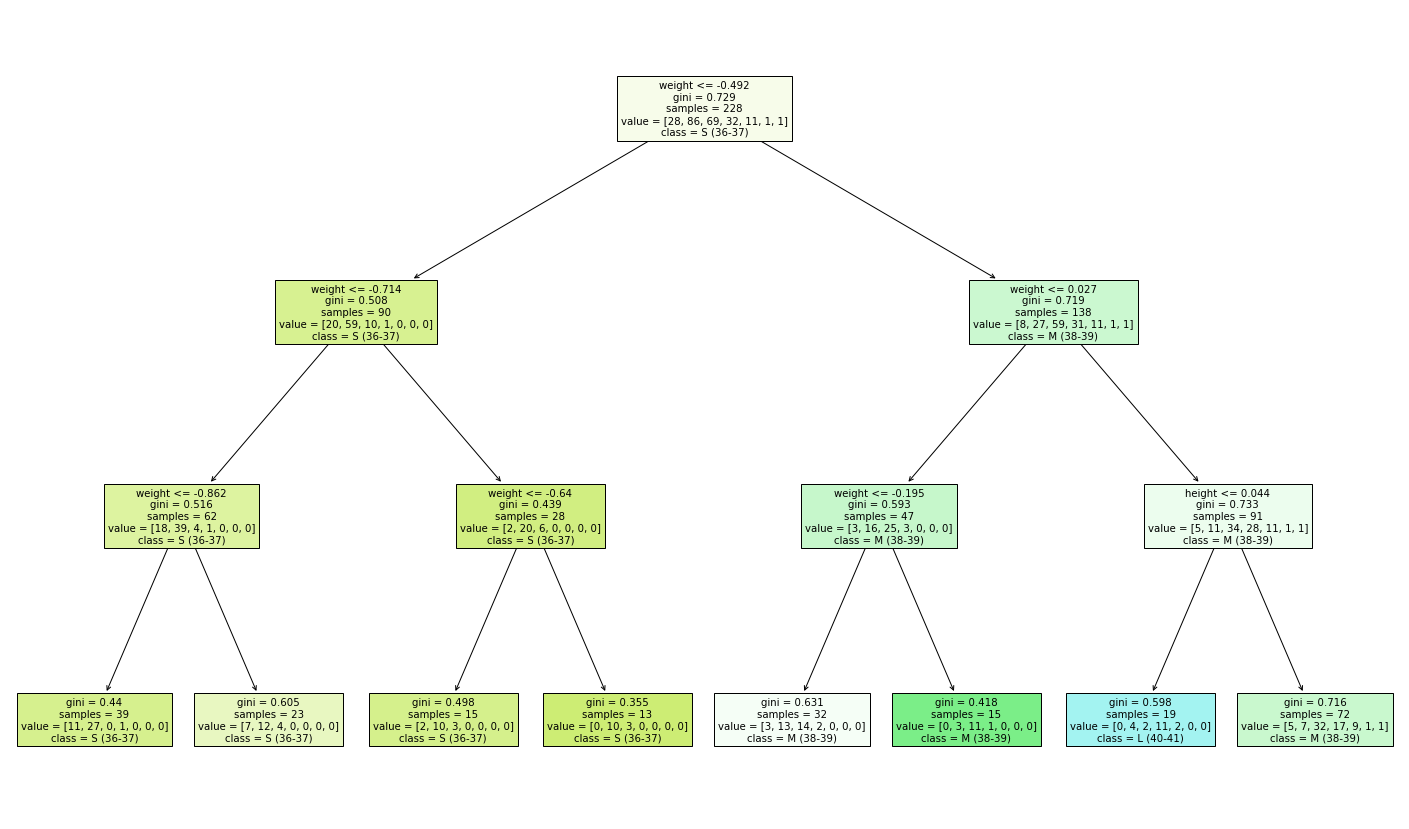

In [105]:
plt.figure(figsize=(25, 15))
plot_tree(best_tree_without_gender_feature.named_steps.model, 
          filled=True, 
          class_names=[j_sizes[i] for i in best_tree_without_gender_feature.named_steps.model.classes_],
          feature_names=['age', 'height', 'weight'])
plt.savefig(r'..\plots\jeans_size_best_tree_without_gender_feature.pdf', format='pdf', bbox_inches = "tight")

In [106]:
y_pred = best_tree_without_gender_feature.predict(X_test_ws)
y_pred

array([3, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 3, 1, 3, 2, 3, 2,
       2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 3, 2, 1, 1, 3, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1], dtype=int64)

In [107]:
y_test_ws.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [108]:
accuracy_score(y_test_ws, y_pred)

0.3793103448275862

In [109]:
x_axis = np.unique(np.concatenate([y_pred, y_test_ws]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

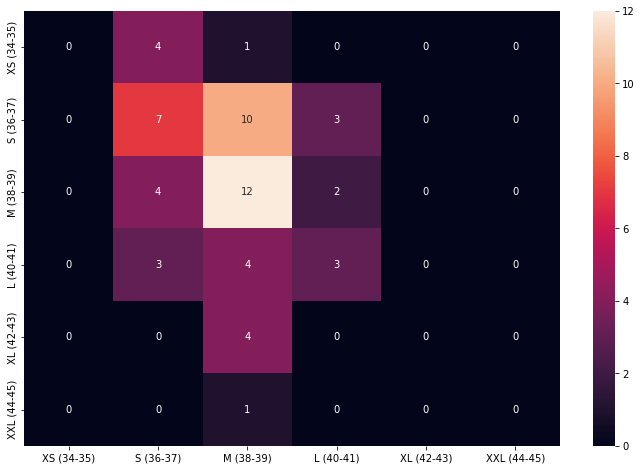

In [110]:
conf_m = confusion_matrix(y_test_ws, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [111]:
best_tree_without_gender_feature.fit(X_ws, y_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=11,
                                        min_samples_split=11))])

In [112]:
with open('..\models\jeans_size_pred_models\decision_tree_classifier_without_gender_feature.pkl', 'wb') as f:
    pickle.dump(best_tree_without_gender_feature, f)

Decision Tree results.
<br>
with all features = 49.9% accuracy score, std = 7% 
<br>
without age feature = 49.0% accuracy score, std = 8%
<br>
without sex seature = 49.1% accuracy score, std = 6%

# SVM

In [113]:
from sklearn.svm import SVC

In [114]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [115]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', SVC())])

In [116]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100, 2)], 
        'model__kernel': ['rbf'],
        'model__gamma': ['scale', 'auto', 0.05, 0.1, 0.15, 0.25],
        'model__coef0': [i for i in range(0, 20, 2)],
        'model__probability': [True]
        
    }
]

In [117]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 4/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=21, model_

[CV 4/10] END model__C=5, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.696 total time=   0.0s
[CV 5/10] END model__C=5, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=5, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=5, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=5, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=5, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=91, model__coef0=

[CV 5/10] END model__C=45, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=45, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=45, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__

[CV 6/10] END model__C=35, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=35, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=35, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=35, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=35, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=3, mode

[CV 8/10] END model__C=21, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=21, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=21, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=71, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=71, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=71, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=71, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=71,

[CV 9/10] END model__C=39, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=73, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=73, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=73, mod

[CV 10/10] END model__C=89, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=35, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=35, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=35, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=35, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=35, model_

[CV 10/10] END model__C=43, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=73, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=73, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=73, 

[CV 3/10] END model__C=7, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.696 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=7, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=7, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=7, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=7, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=7, model__coef0=2, model

[CV 8/10] END model__C=3, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=3, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=3, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=19, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=19, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=19, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=19, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.696 total time=   0.0s
[CV 5/10] END model__C=19, model__coef0

[CV 9/10] END model__C=23, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=23, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=23, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=23, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=23, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=23, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=23, mode

[CV 1/10] END model__C=67, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=67, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=67, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=67, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=67, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=67, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=67, model__

[CV 1/10] END model__C=49, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=49, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=49, model__

[CV 1/10] END model__C=37, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=37, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=37, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=37, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=37, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=37, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=37, 

[CV 3/10] END model__C=77, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=77, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=77, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=77, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=77, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=77, model_

[CV 7/10] END model__C=7, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=7, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=7, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=7, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=15, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=15, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=15, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=15, model_

[CV 9/10] END model__C=27, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=27, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=39, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=39, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=39, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=39, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=39, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=39, mode

[CV 8/10] END model__C=17, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=17, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=17, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=35, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=35, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=35,

[CV 8/10] END model__C=7, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=7, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=7, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.696 total time=   0.0s
[CV 5/10] END model__C=7, model__c

[CV 10/10] END model__C=47, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=47, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=47, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=47, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=47, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=47, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=47, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=47, model__coef0

[CV 3/10] END model__C=77, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=77, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=77, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=77, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=77, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=77,

[CV 6/10] END model__C=79, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=79, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=79, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=79, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=65, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=65, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=65,

[CV 6/10] END model__C=49, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=49, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=49, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=49, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=49, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=25, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=25, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=25, mode

[CV 9/10] END model__C=99, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=99, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=27, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=27, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=27, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=27, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=27, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=27,

[CV 9/10] END model__C=87, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=87, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=69, model__c

[CV 3/10] END model__C=41, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=41, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=41, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=41, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=41, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=41, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=41, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=41,

[CV 5/10] END model__C=57, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=57, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=57, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=57, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=57, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=57, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=5, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=

[CV 5/10] END model__C=3, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=3, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=3, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=3, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=3, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=3, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=65, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=65, model_

[CV 5/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=21, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=97, model_

[CV 6/10] END model__C=97, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=97, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=97, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=97, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=97, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=73, mo

[CV 7/10] END model__C=83, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=13, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=13, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=13, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=13, model_

[CV 2/10] END model__C=5, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=5, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=5, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=5, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=5, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=5, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=5, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=12

[CV 5/10] END model__C=23, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=23, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=23, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=23, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=23, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=97, model

[CV 6/10] END model__C=97, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=97, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=97, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=97, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=97, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=41, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=41, model_

[CV 6/10] END model__C=35, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=35, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=35, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=35, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=35, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=95, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=95, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=95, m

[CV 8/10] END model__C=87, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=87, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=87, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=49, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model

[CV 7/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=83, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=83, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=83, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=83, mo

[CV 10/10] END model__C=43, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=65, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=65, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=65, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=65, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=65, 

[CV 2/10] END model__C=93, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=93, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=93, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=93, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=93, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=8

[CV 5/10] END model__C=99, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=99, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=99, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=99, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=99, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=99, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=29, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__

[CV 4/10] END model__C=33, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=33, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=33, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=33, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=53,

[CV 6/10] END model__C=39, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=39, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=39, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=39, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=81, model_

[CV 6/10] END model__C=17, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=17, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=17, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=17, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=17, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=87, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=87, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=87, mode

[CV 8/10] END model__C=5, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=5, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=55, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=55, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=55, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=55, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=55, mo

[CV 3/10] END model__C=13, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=13, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=13, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=13, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=13, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=13, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model

[CV 7/10] END model__C=39, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=39, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=39, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=47, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=47, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=47, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=47, mo

[CV 9/10] END model__C=29, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=47, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=47, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=47, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=47, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=47, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=47, model__coef

[CV 10/10] END model__C=63, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=43, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=43, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=43, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C

[CV 10/10] END model__C=81, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=49, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=49, model__coef

[CV 4/10] END model__C=65, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=27, model__coef0=

[CV 6/10] END model__C=47, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=47, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=47, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=47, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=47, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=81, mode

[CV 10/10] END model__C=41, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=73, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=73, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=73,

[CV 2/10] END model__C=7, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=7, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=7, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=7, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=7, model__c

[CV 6/10] END model__C=51, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=51, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=51, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=51, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=51, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=67,

[CV 6/10] END model__C=21, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=21, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=21, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=21, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=21, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=57, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=57, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=57, mode

[CV 7/10] END model__C=95, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=95, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=95, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=43, mo

[CV 10/10] END model__C=65, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=69, m

[CV 10/10] END model__C=47, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=21, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=21, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=21, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=21, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=21,

[CV 4/10] END model__C=31, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=31, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=31, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=31, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=31, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=31, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=31, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=7, model__

[CV 5/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=33, 

[CV 7/10] END model__C=89, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=89, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=89, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=89, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=15, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=15, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=15, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=15, 

[CV 9/10] END model__C=41, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=41, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.696 total time=   0.0s
[CV 5/10] END model__C=3, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=3, model

[CV 10/10] END model__C=99, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=91, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=91, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=91, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=91, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=91, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=91, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=91, model

[CV 4/10] END model__C=15, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=15, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=15, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=15, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=15, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=15, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=15, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=67,

[CV 5/10] END model__C=29, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=29, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=29, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=29, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=29, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=27, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=27, model

[CV 8/10] END model__C=57, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=57, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=57, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=75, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=75, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=75, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=75, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C

[CV 8/10] END model__C=53, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=35, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=35, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=35, model_

[CV 9/10] END model__C=85, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=85, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=17, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=17, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=17, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=17, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=17, model_

[CV 10/10] END model__C=7, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=31, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=31, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=31, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=31, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=31, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=31, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=31, model__

[CV 2/10] END model__C=59, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=59, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=59, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=59, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=59, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=59, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=59, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=59, 

[CV 3/10] END model__C=67, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=67, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=67, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=67, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=67, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=67, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=67, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model

[CV 4/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=45,

[CV 6/10] END model__C=23, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=23, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=23, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=23, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=71, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=71, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__

[CV 9/10] END model__C=73, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=37, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=37, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=37, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=37, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=37, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=37, mode

[CV 10/10] END model__C=11, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=45, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=45, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=45, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=45, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=45, model

[CV 1/10] END model__C=23, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=23, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=23, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=23, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=23, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=23, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=23, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=23, 

[CV 10/10] END model__C=71, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=57, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=57, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=57, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=57, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=57, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=57, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=57, mode

[CV 2/10] END model__C=57, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=57, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=57, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=57, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=57, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=57, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=57, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=57, model__

[CV 3/10] END model__C=1, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=1, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=1, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=1, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=1, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=1, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=1, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=1, model__coef0=2

[CV 5/10] END model__C=65, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=17,

[CV 4/10] END model__C=79, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=79, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=79, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=79, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=79, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=79, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=91, model_

[CV 8/10] END model__C=69, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model', SVC())]),
                   n_iter=500,
                   param_distributions=[{'model__C': [1, 3, 5, 7, 9

In [118]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
55        0.036599      0.004082         0.004769        0.000404   
300       0.036820      0.003009         0.005100        0.000482   
14        0.037383      0.003696         0.004927        0.000378   
490       0.035432      0.001590         0.005146        0.001044   
211       0.034191      0.001401         0.004847        0.000448   

    param_model__probability param_model__kernel param_model__gamma  \
55                      True                 rbf                0.1   
300                     True                 rbf               0.05   
14                      True                 rbf               0.05   
490                     True                 rbf               0.05   
211                     True                 rbf               0.25   

    param_model__coef0 param_model__C  \
55                   6              3   
300                  4             15   
14                   0             15   
490                 16             15   
211                 12              1   

                                                params  ...  \
55   {'model__probability': True, 'model__kernel': ...  ...   
300  {'model__probability': True, 'model__kernel': ...  ...   
14   {'model__probability': True, 'model__kernel': ...  ...   
490  {'model__probability': True, 'model__kernel': ...  ...   
211  {'model__probability': True, 'model__kernel': ...  ...   

     split3_test_score  split4_test_score  split5_test_score  \
55            0.608696           0.478261           0.347826   
300           0.695652           0.521739           0.347826   
14            0.695652           0.521739           0.347826   
490           0.695652           0.521739           0.347826   
211           0.608696           0.478261           0.347826   

     split6_test_score  split7_test_score  split8_test_score  \
55            0.434783           0.521739                0.5   
300           0.434783           0.478261                0.5   
14            0.434783           0.478261                0.5   
490           0.434783           0.478261                0.5   
211           0.434783           0.565217                0.5   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
55            0.590909         0.509091        0.072668                1  
300           0.545455         0.504545        0.083614                2  
14            0.545455         0.504545        0.083614                2  
490           0.545455         0.504545        0.083614                2  
211           0.500000         0.504348        0.075181                5  

[5 rows x 23 columns]

In [119]:
best_svc = rand_search.best_estimator_
best_svc.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', SVC(C=3, coef0=6, gamma=0.1, probability=True))])

In [120]:
y_pred = best_svc.predict(X_test)
y_pred

array([2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 3, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 1, 1, 3, 2, 3, 1, 1, 2, 1, 2, 1], dtype=int64)

In [121]:
y_test.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [122]:
accuracy_score(y_test, y_pred)

0.3793103448275862

In [123]:
x_axis = np.unique(np.concatenate([y_pred, y_test]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

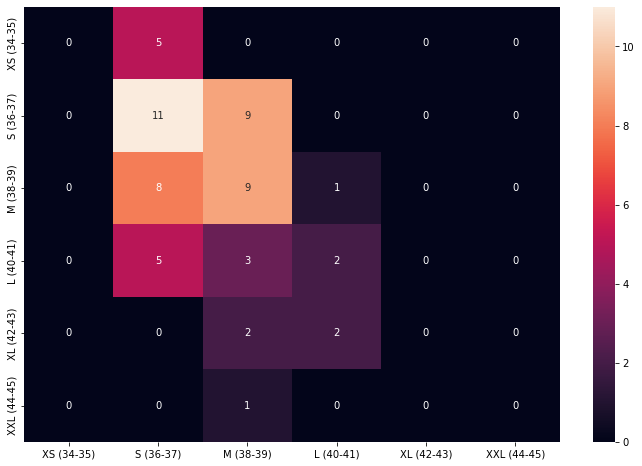

In [124]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [125]:
best_svc.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', SVC(C=3, coef0=6, gamma=0.1, probability=True))])

In [126]:
with open('..\models\jeans_size_pred_models\svc.pkl', 'wb') as f:
    pickle.dump(best_svc, f)

Without Age feature

In [127]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [128]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', SVC())])

In [129]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100, 2)], 
        'model__kernel': ['rbf'],
        'model__gamma': ['scale', 'auto', 0.05, 0.1, 0.15, 0.25, 1, 10],
        'model__coef0': [i for i in range(0, 20, 2)],
        'model__probability': [True]
        
    }
]

In [130]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_wa, y_train_wa)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__C=3, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=3, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 6/10] END model__C=3, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=3, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=3, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=3, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=3, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=35, model__coe

[CV 6/10] END model__C=85, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=85, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=85, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=85, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=85, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=9, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=9, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=9, model__co

[CV 6/10] END model__C=7, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=7, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=7, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=7, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=7, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=25, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=25, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=25, model__coef0=6, model

[CV 9/10] END model__C=1, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=1, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0

[CV 9/10] END model__C=65, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=33, model__coe

[CV 9/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=43, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=43, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=43

[CV 1/10] END model__C=33, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=33, model__

[CV 4/10] END model__C=97, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=97, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=97, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=97, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=97, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=97, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=97, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=99, model_

[CV 8/10] END model__C=29, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=29, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=9, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=9, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=9, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=9, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=9, model__coef0=4, 

[CV 9/10] END model__C=27, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=27, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=21, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=21, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=21, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=21, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=21, model

[CV 1/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=47, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=47, model__

[CV 2/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=99, model__

[CV 7/10] END model__C=9, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=9, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=9, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=9, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=61, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=61, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=61, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=61, 

[CV 9/10] END model__C=43, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=43, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=51, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=51, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=51, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=51, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=51, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=51, model_

[CV 9/10] END model__C=39, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=91, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=91, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=91, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=91, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=91, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=9

[CV 1/10] END model__C=23, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=23, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=23, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=23, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=23, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=23, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=23, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=23, model__

[CV 3/10] END model__C=75, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=75, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=75, model__coef0=14, mod

[CV 4/10] END model__C=37, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=37, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=37, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=37, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=37, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=37, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=9, model__coef0=12, mode

[CV 9/10] END model__C=11, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=11, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=69, model__coef

[CV 2/10] END model__C=95, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=95, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=95, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=95, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=95, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=95, model__

[CV 4/10] END model__C=55, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=55, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=55, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=55, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=55, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=55, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=55, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=49, model_

[CV 5/10] END model__C=71, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=71, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=71, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=71, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=71, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=57, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=57, model_

[CV 6/10] END model__C=57, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=57, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=57, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=57, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=57, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=41, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=41, model

[CV 9/10] END model__C=99, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=99, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=17, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=17, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=17, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=17, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=17, mod

[CV 2/10] END model__C=9, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=9, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=9, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=9, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=9, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=9, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=9, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=9, model__coef0=0,

[CV 5/10] END model__C=47, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=47, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=47, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=47, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=47, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=47, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=5, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=5, mo

[CV 8/10] END model__C=61, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=61, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=61, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=43, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=43, model__coef0=2,

[CV 1/10] END model__C=13, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 2/10] END model__C=13, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=13, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=13, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=13, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=13, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=13, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=6, model

[CV 4/10] END model__C=75, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=75, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=29,

[CV 7/10] END model__C=23, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=23, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=23, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=71, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=71, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=71, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=71, model_

[CV 7/10] END model__C=77, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=77, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=77, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=65, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=65, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=65, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=65, model__coef0=0, model__

[CV 8/10] END model__C=99, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=99, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=99, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=35, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=35, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=35, model__co

[CV 9/10] END model__C=33, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=33, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=29, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 2/10] END model__C=29, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=29, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=29, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=29, model__coef0=0

[CV 1/10] END model__C=39, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=39, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=39, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=39, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=39, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=39, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=39, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=39, model__

[CV 2/10] END model__C=1, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 3/10] END model__C=1, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=1, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=1, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=1, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=1, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=1, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=1, model__coef0=8, model__gamma=

[CV 2/10] END model__C=39, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=39, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=39, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=39, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=39, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=39, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=39, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=39, model__coef0=2, model__gamma

[CV 2/10] END model__C=91, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=91, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=91, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=91, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=91, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=91, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=91, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=91, model__

[CV 5/10] END model__C=73, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=73, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=73, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=71, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=71, 

[CV 8/10] END model__C=39, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=39, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=2,

[CV 8/10] END model__C=85, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=85, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=85, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=3, mode

[CV 8/10] END model__C=63, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=63, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=63, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=61, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=61, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=61, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=61, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=61, model__c

[CV 10/10] END model__C=27, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=85, model__

[CV 1/10] END model__C=59, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=59, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=59, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=59, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=59, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=59, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=59, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=59, model__coef0=1

[CV 4/10] END model__C=87, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=87, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=87, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=87, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=87, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=39, model_

[CV 4/10] END model__C=75, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=75, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=83,

[CV 7/10] END model__C=41, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=41, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=41, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=41, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=17, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=17, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=17,

[CV 10/10] END model__C=95, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=49, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=49, model__coef0=

[CV 3/10] END model__C=5, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=5, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=5, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=5, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=5, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=5, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=5, model__coef0=2

[CV 4/10] END model__C=85, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=85, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=85, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=85, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=85, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=85, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=85, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=77, model__coef0=8, mode

[CV 9/10] END model__C=7, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=7, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=15, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=15, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=15, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=15, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=15, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=15, mod

[CV 9/10] END model__C=89, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=89, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=97, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=97, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=97, model__coef

[CV 2/10] END model__C=17, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=17, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=17, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=17, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=17, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=17, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=17, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=17, model__coef0=1

[CV 3/10] END model__C=13, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=13, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=13, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=13, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=13, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=13, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=13, model__coef0=4, mode

[CV 3/10] END model__C=11, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=11, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=11, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=11, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=11, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=11, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=11, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=11, model__coef0=4, model__gamm

[CV 3/10] END model__C=49, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=49, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=49, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=49, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=49,

[CV 5/10] END model__C=13, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=13, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=13, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=13, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=13, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=

[CV 6/10] END model__C=27, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=27, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=27, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=27, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=27, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=63, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=63, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=63, mode

[CV 8/10] END model__C=99, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=99, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=99, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=41, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=41, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=41, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=41, model__coef

[CV 10/10] END model__C=97, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=49, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=49, mo

[CV 10/10] END model__C=79, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=63, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=63, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=63, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=63, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=63, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=63, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=63, model__coef0

[CV 3/10] END model__C=93, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=93, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=93, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=93, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=93, model__coef0=8, mode

[CV 5/10] END model__C=61, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=61, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=61, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=61, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=61, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=61, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=73, model__

[CV 5/10] END model__C=61, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=61, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=61, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=61, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=61, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=61, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=77, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=16, mo

[CV 7/10] END model__C=89, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=89, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=89, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=91, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.5s
[CV 2/10] END model__C=91, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.3s
[CV 3/10] END model__C=91, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.2s
[CV 4/10] END model__C=91, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.2s
[CV 5/10] END model__C=91, 

[CV 2/10] END model__C=45, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=45, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=45, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=45, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=45, 

[CV 2/10] END model__C=87, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=87, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=87, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=87, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=87, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=87, model__

[CV 8/10] END model__C=53, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=29, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 2/10] END model__C=29, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=29, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=29, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=4

[CV 1/10] END model__C=95, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=95, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=95, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=95, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=95, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=95, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=6, model

[CV 3/10] END model__C=57, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=57, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=57, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=57, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=57, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=57, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=57, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=57, model_

[CV 9/10] END model__C=43, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=43, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=53, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=53, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=53, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=53, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=53, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=53, model__coef0=10,

[CV 10/10] END model__C=49, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=41, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=41, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=41, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=41, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=41, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=41, 

[CV 2/10] END model__C=45, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=45, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=45, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=45, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=2, model__gamma

[CV 7/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=71, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=71, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=71, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model

[CV 10/10] END model__C=79, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=37, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=37, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=37, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=37, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=37, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=37, 

[CV 10/10] END model__C=73, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=33, model_

[CV 5/10] END model__C=23, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=23, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=23, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=23, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=23, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=15, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=15, model

[CV 5/10] END model__C=11, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=11, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=11, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=11, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=11, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=11, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.636 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=41, model

[CV 10/10] END model__C=57, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=69, mo

[CV 6/10] END model__C=7, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=7, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=7, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=7, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=7, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=65, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=65, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=65, model__

[CV 1/10] END model__C=3, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=3, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=3, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=3, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=3, model__coef0=0,

[CV 6/10] END model__C=19, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=19, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=19, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=19, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=19, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=81, mode

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model', SVC())]),
                   n_iter=500,
                   param_distributions=[{'model__C': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25,

In [131]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
351       0.036901      0.002700         0.004532        0.000548   
465       0.029521      0.003763         0.003690        0.000457   
93        0.038743      0.003337         0.004875        0.000569   
305       0.034737      0.002057         0.005067        0.000234   
443       0.026928      0.002856         0.003690        0.000457   

    param_model__probability param_model__kernel param_model__gamma  \
351                     True                 rbf                0.1   
465                     True                 rbf                0.1   
93                      True                 rbf                0.1   
305                     True                 rbf               0.15   
443                     True                 rbf               0.15   

    param_model__coef0 param_model__C  \
351                  8             21   
465                 12             23   
93                  16             23   
305                 10             11   
443                  4             11   

                                                params  ...  \
351  {'model__probability': True, 'model__kernel': ...  ...   
465  {'model__probability': True, 'model__kernel': ...  ...   
93   {'model__probability': True, 'model__kernel': ...  ...   
305  {'model__probability': True, 'model__kernel': ...  ...   
443  {'model__probability': True, 'model__kernel': ...  ...   

     split3_test_score  split4_test_score  split5_test_score  \
351           0.608696           0.434783           0.521739   
465           0.608696           0.478261           0.478261   
93            0.608696           0.478261           0.478261   
305           0.608696           0.434783           0.521739   
443           0.608696           0.434783           0.521739   

     split6_test_score  split7_test_score  split8_test_score  \
351           0.478261           0.521739           0.545455   
465           0.478261           0.521739           0.545455   
93            0.478261           0.521739           0.545455   
305           0.478261           0.521739           0.545455   
443           0.478261           0.521739           0.545455   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
351           0.636364         0.526877        0.056869                1  
465           0.636364         0.526877        0.053442                1  
93            0.636364         0.526877        0.053442                1  
305           0.636364         0.526877        0.056869                1  
443           0.636364         0.526877        0.056869                1  

[5 rows x 23 columns]

In [132]:
best_svc_without_age_feature = rand_search.best_estimator_
best_svc_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', SVC(C=23, coef0=8, gamma=0.1, probability=True))])

In [133]:
y_pred = best_svc_without_age_feature.predict(X_test_wa)
y_pred

array([2, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 1, 3, 2, 2, 2,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 1, 2, 3, 2, 3, 1, 1, 1, 1, 2, 1], dtype=int64)

In [134]:
y_test_wa.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [135]:
accuracy_score(y_test_wa, y_pred)

0.3793103448275862

In [136]:
x_axis = np.unique(np.concatenate([y_pred, y_test_wa]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

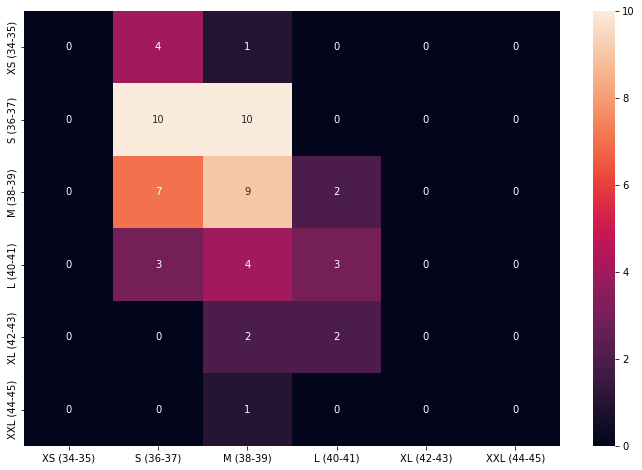

In [137]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [138]:
best_svc_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', SVC(C=23, coef0=8, gamma=0.1, probability=True))])

In [139]:
with open('..\models\jeans_size_pred_models\svc_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_svc_without_age_feature, f)

Without Sex feature

In [140]:
pipeline = Pipeline([('standard_scaler', StandardScaler()),
                     ('model', SVC())])

In [141]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100, 2)], 
        'model__kernel': ['rbf'],
        'model__gamma': ['scale', 'auto', 0.05, 0.1, 0.15, 0.25, 1, 10],
        'model__coef0': [i for i in range(0, 20, 2)],
        'model__probability': [True]
        
    }
]

In [142]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_ws, y_train_ws)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__C=33, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 6/10] END model__C=33, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=33, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=33, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=33, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=67, m

[CV 6/10] END model__C=75, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=75, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=75, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=75, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=75, m

[CV 10/10] END model__C=75, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=35, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=35, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=35, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=35, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=35, model__coef0

[CV 2/10] END model__C=31, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=31, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=31, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=31, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=31, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=31, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=31, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=31, model__coef0=10, mode

[CV 3/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=21, model_

[CV 3/10] END model__C=71, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=71, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=71, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=71, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=71, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=71, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model

[CV 7/10] END model__C=53, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=53, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=83, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=83, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=83, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=83,

[CV 10/10] END model__C=73, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=1, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=1, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=1, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=1, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=1, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=1, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 7/10] END model__C=1, model__coef0

[CV 1/10] END model__C=49, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=49, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=49, 

[CV 3/10] END model__C=33, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=33, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=33, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=33, model_

[CV 3/10] END model__C=99, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=99, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=99, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=99, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=99, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=99, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=99, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=99, model_

[CV 5/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=37, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=37, model

[CV 6/10] END model__C=95, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=95, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=95, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=53, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=53, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=53, model__co

[CV 9/10] END model__C=65, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=29, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=29, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=29, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=29, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=29, model__coef0=0, model

[CV 10/10] END model__C=95, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=71, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=71, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=71, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=71, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=71, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=71, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=71,

[CV 4/10] END model__C=49, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=49, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=49, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=49, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=49, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=75,

[CV 6/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=97,

[CV 8/10] END model__C=63, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=63, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=63, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=45, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=45, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=45, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=45, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0

[CV 4/10] END model__C=37, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=37, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=37, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=37, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=37, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=37, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=18, model__gamm

[CV 6/10] END model__C=97, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=97, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=97, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=97, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=97, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=17, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=17, model_

[CV 7/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=43, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=83, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=83, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=83, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=83,

[CV 1/10] END model__C=29, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=29, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=29, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=29, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=29, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=29, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=29, 

[CV 1/10] END model__C=39, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=39, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=39, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=39, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=39, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=39, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=39, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=39, model__

[CV 6/10] END model__C=41, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=41, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=41, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=41, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=41, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=59, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=59, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=59, model__coef0=4, 

[CV 2/10] END model__C=85, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=85, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=85, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=85, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=85, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=85, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=85, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=85, model__coef0=0, model

[CV 4/10] END model__C=57, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=57, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=57, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=57, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=57, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=57, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=57, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.273 total time=   0.0s
[CV 1/10] END model__C=37, model__coef0=

[CV 7/10] END model__C=9, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=9, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=9, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=9, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=31, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=31, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=31, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=31, model__coef0=0

[CV 9/10] END model__C=3, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=3, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.318 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=35, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=35, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=35, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=35, model__coef0=8, model__gamm

[CV 1/10] END model__C=53, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 2/10] END model__C=53, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=53, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=53, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=53, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=53, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=53, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=53, model__coef0=1

[CV 4/10] END model__C=13, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=13, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=13, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=13, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=13, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=13, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=9, 

[CV 5/10] END model__C=87, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=87, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=87, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=87, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=59, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=59, model__coef0=4, mo

[CV 7/10] END model__C=53, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=53, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=23, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=23, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=23, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=23, model__coef

[CV 7/10] END model__C=55, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=55, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=55, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=55, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=93, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=93, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=93, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=93, model_

[CV 1/10] END model__C=33, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=33, model__coef0=0, model__gamma

[CV 7/10] END model__C=15, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=15, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=15, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=15, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=97, mo

[CV 10/10] END model__C=25, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=25, model

[CV 1/10] END model__C=49, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=49, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=49, model__

[CV 7/10] END model__C=43, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=43, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=43, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=43, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 4/10] END model__C=97, model__coef

[CV 8/10] END model__C=15, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=15, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=15, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=77, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=77, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=77, model_

[CV 4/10] END model__C=81, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=81, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=81, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=81, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=

[CV 7/10] END model__C=75, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=75, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=81

[CV 9/10] END model__C=51, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=51, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.273 total time=   0.0s
[CV 1/10] END model__C=47, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=47, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 3/10] END model__C=47, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=47, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=47, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=47, model__coef0=0, model__ga

[CV 3/10] END model__C=95, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 4/10] END model__C=95, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=95, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=95, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=95, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=95, model__coef0=4, model__gamm

[CV 8/10] END model__C=7, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=7, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=7, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=89, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=89, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=89, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=89, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=89, model

[CV 10/10] END model__C=17, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.696 total time=   0.0s
[CV 5/10] END model__C=3, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=3, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=3, model__

[CV 6/10] END model__C=67, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=67, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=67, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=67, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=67, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=95, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=95, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=95, mode

[CV 1/10] END model__C=93, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=93, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=93, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=93, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=93, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=93, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=93, model__

[CV 4/10] END model__C=31, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=31, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=31, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=31, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=31, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=31, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=31, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=1, model__

[CV 5/10] END model__C=91, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=91, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=91, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=91, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=91, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=91, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=45, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=45, m

[CV 6/10] END model__C=35, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=35, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=35, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=35, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=35, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=18, mo

[CV 9/10] END model__C=39, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.273 total time=   0.0s
[CV 1/10] END model__C=27, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=27, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=27, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=27, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=27, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=27, model__coef0=

[CV 1/10] END model__C=81, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=81, model__coef0=1

[CV 4/10] END model__C=69, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=49,

[CV 5/10] END model__C=87, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=87, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=87, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=87, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=87, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=87, model__

[CV 9/10] END model__C=29, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=59, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=59, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 3/10] END model__C=59, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=59, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=59, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=59, model__coef0=1

[CV 9/10] END model__C=53, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=97, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=97, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=97, mode

[CV 10/10] END model__C=21, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.273 total time=   0.0s
[CV 1/10] END model__C=29, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=29, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=29, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=29, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=29, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=29, mo

[CV 2/10] END model__C=13, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=13, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=13, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=13, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=13, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=13, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=13, model__coef0=1

[CV 2/10] END model__C=55, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=55, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=55, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=55, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=55, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=55, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=55, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=55, 

[CV 2/10] END model__C=87, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=87, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=87, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=87, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=87, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=87, model__coef0=0, model

[CV 2/10] END model__C=29, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=29, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=29, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=29, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=29, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=29, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=29, 

[CV 5/10] END model__C=15, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=15, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=15, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=15, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=15, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=15, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=19, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__

[CV 5/10] END model__C=25, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=25, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=25, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=25, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=25, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=25, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=93, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=93, model_

[CV 5/10] END model__C=93, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=93, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=93, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=93, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=7, m

[CV 9/10] END model__C=31, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=31, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=69, model__coe

[CV 1/10] END model__C=77, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=77, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=77, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=77, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=77, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=0

[CV 6/10] END model__C=69, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=47, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=47, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=47, model__coef0=

[CV 9/10] END model__C=9, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=9, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=25, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=25, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=25, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=25, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=25, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=25, model__coef

[CV 10/10] END model__C=49, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=99, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=99, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=99, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=99, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=99, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=99, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=99, model__coef

[CV 3/10] END model__C=89, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=89, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=89, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=89, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=89, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=89, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=89, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 10/10] END model__C=89,

[CV 7/10] END model__C=93, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=93, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.273 total time=   0.0s
[CV 1/10] END model__C=31, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=31, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=31, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=31, model__c

[CV 2/10] END model__C=45, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 3/10] END model__C=45, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=45, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=45, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=8, model__gamma

[CV 2/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=47, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model_

[CV 5/10] END model__C=39, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=39, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=39, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=39, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=39, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=3, m

[CV 9/10] END model__C=95, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=95, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=43, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=43, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=43, model__c

[CV 3/10] END model__C=17, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 4/10] END model__C=17, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=17, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=17, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=17, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=17, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=17, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=17, model__coef0=8, mode

[CV 6/10] END model__C=63, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=63, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=63, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=63, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=63, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=45, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=45, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=45, m

[CV 9/10] END model__C=85, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 10/10] END model__C=85, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=49, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=49, m

[CV 4/10] END model__C=41, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=41, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=41, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 7/10] END model__C=41, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=41, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=41, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 10/10] END model__C=41, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=47, model__coef0=

[CV 9/10] END model__C=61, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 10/10] END model__C=61, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=83, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 6/10] END model__C=83,

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standard_scaler',
                                              StandardScaler()),
                                             ('model', SVC())]),
                   n_iter=500,
                   param_distributions=[{'model__C': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49, 51,
                                                      53, 55, 57, 59, ...],
                                         'model__coef0': [0, 2, 4, 6, 8, 10, 12,
                                                          14, 16, 18],
                                         'model__gamma': ['scale', 'auto', 0.05,
                                                          0.1, 0.15, 0.25, 1,
                                              

In [143]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
452       0.033710      0.005812         0.003291    4.571376e-04   
167       0.025734      0.002042         0.001995    8.856857e-07   
443       0.031316      0.002531         0.002593    9.135198e-04   
115       0.026037      0.003468         0.001991    4.383828e-04   
58        0.025731      0.001246         0.002394    4.884999e-04   

    param_model__probability param_model__kernel param_model__gamma  \
452                     True                 rbf               0.05   
167                     True                 rbf               0.05   
443                     True                 rbf               0.05   
115                     True                 rbf               0.05   
58                      True                 rbf               0.05   

    param_model__coef0 param_model__C  \
452                 14             23   
167                  4             19   
443                  6             21   
115                  0             17   
58                   0              9   

                                                params  ...  \
452  {'model__probability': True, 'model__kernel': ...  ...   
167  {'model__probability': True, 'model__kernel': ...  ...   
443  {'model__probability': True, 'model__kernel': ...  ...   
115  {'model__probability': True, 'model__kernel': ...  ...   
58   {'model__probability': True, 'model__kernel': ...  ...   

     split3_test_score  split4_test_score  split5_test_score  \
452           0.739130           0.565217            0.26087   
167           0.739130           0.565217            0.26087   
443           0.739130           0.565217            0.26087   
115           0.739130           0.565217            0.26087   
58            0.608696           0.565217            0.26087   

     split6_test_score  split7_test_score  split8_test_score  \
452           0.434783           0.434783           0.545455   
167           0.434783           0.434783           0.545455   
443           0.434783           0.434783           0.545455   
115           0.391304           0.391304           0.590909   
58            0.391304           0.478261           0.590909   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
452           0.454545         0.491304        0.116491                1  
167           0.454545         0.491304        0.116491                1  
443           0.454545         0.491304        0.116491                1  
115           0.454545         0.487154        0.124951                4  
58            0.454545         0.487154        0.101587                4  

[5 rows x 23 columns]

In [144]:
best_svc_without_gender_feature = rand_search.best_estimator_
best_svc_without_gender_feature.fit(X_train_ws, y_train_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', SVC(C=19, coef0=4, gamma=0.05, probability=True))])

In [145]:
y_pred = best_svc_without_gender_feature.predict(X_test_ws)
y_pred

array([2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1], dtype=int64)

In [146]:
y_test_ws.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [147]:
accuracy_score(y_test_ws, y_pred)

0.39655172413793105

In [148]:
x_axis = np.unique(np.concatenate([y_pred, y_test_ws]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

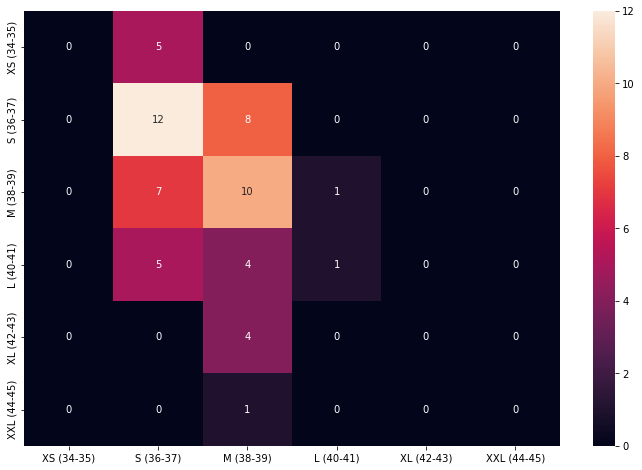

In [149]:
conf_m = confusion_matrix(y_test_ws, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [150]:
best_svc_without_gender_feature.fit(X_ws, y_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', SVC(C=19, coef0=4, gamma=0.05, probability=True))])

In [151]:
with open('..\models\jeans_size_pred_models\svc_without_gender_feature.pkl', 'wb') as f:
    pickle.dump(best_svc_without_gender_feature, f)

SVM results.
<br>
with all features = 47.4% accuracy score, std = 12% 
<br>
without age feature = 48.5% accuracy score, std = 3%
<br>
without sex seature = 45.2% accuracy score, std = 7%

# K Neighbors

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [154]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', KNeighborsClassifier())])

In [155]:
param_grid = [
    {
        'model__n_neighbors': [i for i in range(1, 40)], 
        'model__weights': ['uniform', 'distance'],
    }
]

In [156]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 78 is smaller than n_iter=500. Running 78 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 78 candidates, totalling 780 fits
[CV 1/10] END model__n_neighbors=1, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 2/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 4/10] END model__n_neighbors=1, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 6/10] END model__n_neighbors=1, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=1, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=1, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=1, model__weights=uniform;, score=0.318 total time=   0.0s
[CV 10/10] END model__n_neighbors=1, model__weights=uniform;, score=0.364 total time=   0.0s
[CV 1/10] END mo

[CV 7/10] END model__n_neighbors=5, model__weights=distance;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=5, model__weights=distance;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=5, model__weights=distance;, score=0.364 total time=   0.0s
[CV 10/10] END model__n_neighbors=5, model__weights=distance;, score=0.364 total time=   0.0s
[CV 1/10] END model__n_neighbors=6, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=6, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=6, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=6, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 5/10] END model__n_neighbors=6, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 6/10] END model__n_neighbors=6, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=6, model__weights=uniform;, score=0.522 to

[CV 7/10] END model__n_neighbors=10, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 8/10] END model__n_neighbors=10, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=10, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 10/10] END model__n_neighbors=10, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 1/10] END model__n_neighbors=10, model__weights=distance;, score=0.435 total time=   0.0s
[CV 2/10] END model__n_neighbors=10, model__weights=distance;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=10, model__weights=distance;, score=0.304 total time=   0.0s
[CV 4/10] END model__n_neighbors=10, model__weights=distance;, score=0.522 total time=   0.0s
[CV 5/10] END model__n_neighbors=10, model__weights=distance;, score=0.348 total time=   0.0s
[CV 6/10] END model__n_neighbors=10, model__weights=distance;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=10, model__weights=distance;, 

[CV 8/10] END model__n_neighbors=14, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=14, model__weights=distance;, score=0.500 total time=   0.0s
[CV 10/10] END model__n_neighbors=14, model__weights=distance;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=15, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 2/10] END model__n_neighbors=15, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 3/10] END model__n_neighbors=15, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 4/10] END model__n_neighbors=15, model__weights=uniform;, score=0.609 total time=   0.0s
[CV 5/10] END model__n_neighbors=15, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 6/10] END model__n_neighbors=15, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=15, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=15, model__weights=uniform;, scor

[CV 7/10] END model__n_neighbors=19, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 8/10] END model__n_neighbors=19, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=19, model__weights=uniform;, score=0.500 total time=   0.0s
[CV 10/10] END model__n_neighbors=19, model__weights=uniform;, score=0.545 total time=   0.0s
[CV 1/10] END model__n_neighbors=19, model__weights=distance;, score=0.478 total time=   0.0s
[CV 2/10] END model__n_neighbors=19, model__weights=distance;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=19, model__weights=distance;, score=0.348 total time=   0.0s
[CV 4/10] END model__n_neighbors=19, model__weights=distance;, score=0.565 total time=   0.0s
[CV 5/10] END model__n_neighbors=19, model__weights=distance;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=19, model__weights=distance;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=19, model__weights=distance;, 

[CV 7/10] END model__n_neighbors=23, model__weights=distance;, score=0.435 total time=   0.0s
[CV 8/10] END model__n_neighbors=23, model__weights=distance;, score=0.391 total time=   0.0s
[CV 9/10] END model__n_neighbors=23, model__weights=distance;, score=0.545 total time=   0.0s
[CV 10/10] END model__n_neighbors=23, model__weights=distance;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=24, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 2/10] END model__n_neighbors=24, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 3/10] END model__n_neighbors=24, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=24, model__weights=uniform;, score=0.652 total time=   0.0s
[CV 5/10] END model__n_neighbors=24, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 6/10] END model__n_neighbors=24, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=24, model__weights=uniform;, sco

[CV 6/10] END model__n_neighbors=28, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 7/10] END model__n_neighbors=28, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=28, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 9/10] END model__n_neighbors=28, model__weights=uniform;, score=0.500 total time=   0.0s
[CV 10/10] END model__n_neighbors=28, model__weights=uniform;, score=0.591 total time=   0.0s
[CV 1/10] END model__n_neighbors=28, model__weights=distance;, score=0.478 total time=   0.0s
[CV 2/10] END model__n_neighbors=28, model__weights=distance;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=28, model__weights=distance;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=28, model__weights=distance;, score=0.565 total time=   0.0s
[CV 5/10] END model__n_neighbors=28, model__weights=distance;, score=0.478 total time=   0.0s
[CV 6/10] END model__n_neighbors=28, model__weights=distance;, s

[CV 8/10] END model__n_neighbors=32, model__weights=distance;, score=0.435 total time=   0.0s
[CV 9/10] END model__n_neighbors=32, model__weights=distance;, score=0.500 total time=   0.0s
[CV 10/10] END model__n_neighbors=32, model__weights=distance;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=33, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=33, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 3/10] END model__n_neighbors=33, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=33, model__weights=uniform;, score=0.609 total time=   0.0s
[CV 5/10] END model__n_neighbors=33, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 6/10] END model__n_neighbors=33, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 7/10] END model__n_neighbors=33, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=33, model__weights=uniform;, scor

[CV 4/10] END model__n_neighbors=37, model__weights=distance;, score=0.565 total time=   0.0s
[CV 5/10] END model__n_neighbors=37, model__weights=distance;, score=0.478 total time=   0.0s
[CV 6/10] END model__n_neighbors=37, model__weights=distance;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=37, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=37, model__weights=distance;, score=0.522 total time=   0.0s
[CV 9/10] END model__n_neighbors=37, model__weights=distance;, score=0.500 total time=   0.0s
[CV 10/10] END model__n_neighbors=37, model__weights=distance;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=38, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=38, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 3/10] END model__n_neighbors=38, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 4/10] END model__n_neighbors=38, model__weights=uniform;, 

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=500,
    

In [157]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
44       0.006483      0.000499         0.004488        0.000498   
54       0.007280      0.000457         0.005785        0.000598   
52       0.006783      0.000596         0.004988        0.000446   
76       0.009474      0.001905         0.007181        0.001934   
74       0.010472      0.002007         0.008178        0.001596   

   param_model__weights param_model__n_neighbors  \
44              uniform                       23   
54              uniform                       28   
52              uniform                       27   
76              uniform                       39   
74              uniform                       38   

                                               params  split0_test_score  \
44  {'model__weights': 'uniform', 'model__n_neighb...           0.565217   
54  {'model__weights': 'uniform', 'model__n_neighb...           0.565217   
52  {'model__weights': 'uniform', 'model__n_neighb...           0.565217   
76  {'model__weights': 'uniform', 'model__n_neighb...           0.478261   
74  {'model__weights': 'uniform', 'model__n_neighb...           0.521739   

    split1_test_score  split2_test_score  split3_test_score  \
44           0.565217           0.434783           0.695652   
54           0.521739           0.521739           0.608696   
52           0.521739           0.434783           0.652174   
76           0.521739           0.521739           0.608696   
74           0.521739           0.521739           0.608696   

    split4_test_score  split5_test_score  split6_test_score  \
44           0.521739           0.347826           0.434783   
54           0.521739           0.391304           0.391304   
52           0.565217           0.391304           0.391304   
76           0.478261           0.391304           0.391304   
74           0.478261           0.391304           0.391304   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
44           0.565217           0.545455           0.590909         0.526680   
54           0.565217           0.500000           0.590909         0.517787   
52           0.565217           0.500000           0.590909         0.517787   
76           0.565217           0.500000           0.681818         0.513834   
74           0.565217           0.500000           0.636364         0.513636   

    std_test_score  rank_test_score  
44        0.092945                1  
54        0.071042                2  
52        0.083290                2  
76        0.085283                4  
74        0.076370                5

In [158]:
best_kneighbors = rand_search.best_estimator_
best_kneighbors.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=23))])

In [159]:
y_pred = best_kneighbors.predict(X_test)
y_pred

array([2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1], dtype=int64)

In [160]:
y_test.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [161]:
accuracy_score(y_test, y_pred)

0.3275862068965517

In [162]:
x_axis = np.unique(np.concatenate([y_pred, y_test]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

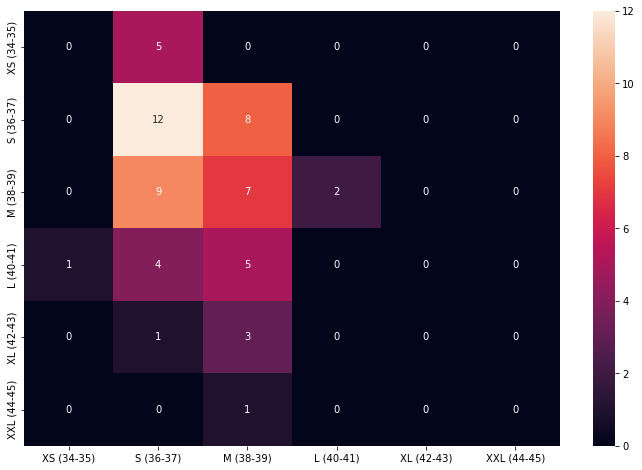

In [163]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [164]:
best_kneighbors.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=23))])

In [165]:
with open('..\models\jeans_size_pred_models\kneighbors_classifier.pkl', 'wb') as f:
    pickle.dump(best_kneighbors, f)

Without Age feature

In [166]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [167]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', KNeighborsClassifier())])

In [168]:
param_grid = [
    {
        'model__n_neighbors': [i for i in range(1, 40)], 
        'model__weights': ['uniform', 'distance'],
    }
]

In [169]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_wa, y_train_wa)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 78 is smaller than n_iter=500. Running 78 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 78 candidates, totalling 780 fits
[CV 1/10] END model__n_neighbors=1, model__weights=uniform;, score=0.217 total time=   0.0s
[CV 2/10] END model__n_neighbors=1, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 3/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 5/10] END model__n_neighbors=1, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=1, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 8/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=1, model__weights=uniform;, score=0.409 total time=   0.0s
[CV 10/10] END model__n_neighbors=1, model__weights=uniform;, score=0.500 total time=   0.0s
[CV 1/10] END mo

[CV 4/10] END model__n_neighbors=5, model__weights=distance;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=5, model__weights=distance;, score=0.261 total time=   0.0s
[CV 6/10] END model__n_neighbors=5, model__weights=distance;, score=0.565 total time=   0.0s
[CV 7/10] END model__n_neighbors=5, model__weights=distance;, score=0.435 total time=   0.0s
[CV 8/10] END model__n_neighbors=5, model__weights=distance;, score=0.391 total time=   0.0s
[CV 9/10] END model__n_neighbors=5, model__weights=distance;, score=0.409 total time=   0.0s
[CV 10/10] END model__n_neighbors=5, model__weights=distance;, score=0.545 total time=   0.0s
[CV 1/10] END model__n_neighbors=6, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 2/10] END model__n_neighbors=6, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=6, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 4/10] END model__n_neighbors=6, model__weights=uniform;, score=0.522

[CV 7/10] END model__n_neighbors=10, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 8/10] END model__n_neighbors=10, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 9/10] END model__n_neighbors=10, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 10/10] END model__n_neighbors=10, model__weights=uniform;, score=0.545 total time=   0.0s
[CV 1/10] END model__n_neighbors=10, model__weights=distance;, score=0.391 total time=   0.0s
[CV 2/10] END model__n_neighbors=10, model__weights=distance;, score=0.565 total time=   0.0s
[CV 3/10] END model__n_neighbors=10, model__weights=distance;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=10, model__weights=distance;, score=0.478 total time=   0.0s
[CV 5/10] END model__n_neighbors=10, model__weights=distance;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=10, model__weights=distance;, score=0.522 total time=   0.0s
[CV 7/10] END model__n_neighbors=10, model__weights=distance;, 

[CV 10/10] END model__n_neighbors=14, model__weights=distance;, score=0.591 total time=   0.0s
[CV 1/10] END model__n_neighbors=15, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=15, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=15, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=15, model__weights=uniform;, score=0.609 total time=   0.0s
[CV 5/10] END model__n_neighbors=15, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=15, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=15, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 8/10] END model__n_neighbors=15, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=15, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 10/10] END model__n_neighbors=15, model__weights=uniform;, score

[CV 5/10] END model__n_neighbors=19, model__weights=distance;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=19, model__weights=distance;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=19, model__weights=distance;, score=0.478 total time=   0.0s
[CV 8/10] END model__n_neighbors=19, model__weights=distance;, score=0.391 total time=   0.0s
[CV 9/10] END model__n_neighbors=19, model__weights=distance;, score=0.500 total time=   0.0s
[CV 10/10] END model__n_neighbors=19, model__weights=distance;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=20, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=20, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 3/10] END model__n_neighbors=20, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=20, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 5/10] END model__n_neighbors=20, model__weights=uniform;, s

[CV 4/10] END model__n_neighbors=24, model__weights=uniform;, score=0.652 total time=   0.0s
[CV 5/10] END model__n_neighbors=24, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 6/10] END model__n_neighbors=24, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 7/10] END model__n_neighbors=24, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 8/10] END model__n_neighbors=24, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 9/10] END model__n_neighbors=24, model__weights=uniform;, score=0.500 total time=   0.0s
[CV 10/10] END model__n_neighbors=24, model__weights=uniform;, score=0.545 total time=   0.0s
[CV 1/10] END model__n_neighbors=24, model__weights=distance;, score=0.435 total time=   0.0s
[CV 2/10] END model__n_neighbors=24, model__weights=distance;, score=0.565 total time=   0.0s
[CV 3/10] END model__n_neighbors=24, model__weights=distance;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=24, model__weights=distance;, sco

[CV 1/10] END model__n_neighbors=29, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=29, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 3/10] END model__n_neighbors=29, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=29, model__weights=uniform;, score=0.652 total time=   0.0s
[CV 5/10] END model__n_neighbors=29, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 6/10] END model__n_neighbors=29, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=29, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 8/10] END model__n_neighbors=29, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 9/10] END model__n_neighbors=29, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 10/10] END model__n_neighbors=29, model__weights=uniform;, score=0.636 total time=   0.0s
[CV 1/10] END model__n_neighbors=29, model__weights=distance;, score=

[CV 3/10] END model__n_neighbors=34, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=34, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 5/10] END model__n_neighbors=34, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 6/10] END model__n_neighbors=34, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 7/10] END model__n_neighbors=34, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=34, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 9/10] END model__n_neighbors=34, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 10/10] END model__n_neighbors=34, model__weights=uniform;, score=0.636 total time=   0.0s
[CV 1/10] END model__n_neighbors=34, model__weights=distance;, score=0.435 total time=   0.0s
[CV 2/10] END model__n_neighbors=34, model__weights=distance;, score=0.522 total time=   0.0s
[CV 3/10] END model__n_neighbors=34, model__weights=distance;, scor

[CV 9/10] END model__n_neighbors=38, model__weights=distance;, score=0.545 total time=   0.0s
[CV 10/10] END model__n_neighbors=38, model__weights=distance;, score=0.545 total time=   0.0s
[CV 1/10] END model__n_neighbors=39, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 2/10] END model__n_neighbors=39, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=39, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=39, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 5/10] END model__n_neighbors=39, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 6/10] END model__n_neighbors=39, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=39, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=39, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 9/10] END model__n_neighbors=39, model__weights=uniform;, score

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=500,
                   param_distributions=[{'model__n_neighbors': [1, 2, 3, 4, 5,
            

In [170]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
42       0.006682      0.000898         0.005286        0.000457   
52       0.006982      0.000892         0.005386        0.000661   
50       0.007380      0.001681         0.005386        0.000798   
44       0.007879      0.001442         0.005585        0.000661   
56       0.008079      0.000698         0.006682        0.001548   

   param_model__weights param_model__n_neighbors  \
42              uniform                       22   
52              uniform                       27   
50              uniform                       26   
44              uniform                       23   
56              uniform                       29   

                                               params  split0_test_score  \
42  {'model__weights': 'uniform', 'model__n_neighb...           0.565217   
52  {'model__weights': 'uniform', 'model__n_neighb...           0.565217   
50  {'model__weights': 'uniform', 'model__n_neighb...           0.565217   
44  {'model__weights': 'uniform', 'model__n_neighb...           0.608696   
56  {'model__weights': 'uniform', 'model__n_neighb...           0.521739   

    split1_test_score  split2_test_score  split3_test_score  \
42           0.521739           0.478261           0.652174   
52           0.521739           0.478261           0.608696   
50           0.521739           0.478261           0.608696   
44           0.521739           0.478261           0.608696   
56           0.521739           0.478261           0.652174   

    split4_test_score  split5_test_score  split6_test_score  \
42           0.565217           0.391304           0.434783   
52           0.565217           0.347826           0.434783   
50           0.565217           0.347826           0.434783   
44           0.521739           0.391304           0.434783   
56           0.521739           0.347826           0.434783   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
42           0.565217           0.545455           0.545455         0.526482   
52           0.565217           0.545455           0.590909         0.522332   
50           0.565217           0.545455           0.590909         0.522332   
44           0.565217           0.545455           0.545455         0.522134   
56           0.565217           0.454545           0.636364         0.513439   

    std_test_score  rank_test_score  
42        0.070745                1  
52        0.076337                2  
50        0.076337                2  
44        0.066784                4  
56        0.086929                5

In [171]:
best_kneighbors_without_age_feature = rand_search.best_estimator_
best_kneighbors_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=22))])

In [172]:
y_pred = best_kneighbors_without_age_feature.predict(X_test_wa)
y_pred

array([2, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 3, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 1, 1, 3, 2, 3, 1, 1, 1, 1, 2, 1], dtype=int64)

In [173]:
y_test_wa.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [174]:
accuracy_score(y_test_wa, y_pred)

0.3793103448275862

In [175]:
x_axis = np.unique(np.concatenate([y_pred, y_test_wa]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

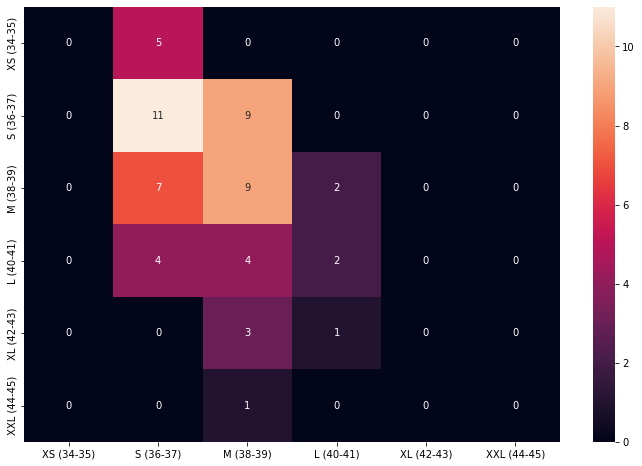

In [176]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [177]:
best_kneighbors_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=22))])

In [178]:
with open('..\models\jeans_size_pred_models\kneighbors_classifier_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_kneighbors_without_age_feature, f)

Without Sex feature

In [179]:
pipeline = Pipeline([('standard_scaler', StandardScaler()),
                     ('model', KNeighborsClassifier())])

In [180]:
param_grid = [
    {
        'model__n_neighbors': [i for i in range(1, 40)], 
        'model__weights': ['uniform', 'distance'],
    }
]

In [181]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_ws, y_train_ws)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 78 is smaller than n_iter=500. Running 78 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 78 candidates, totalling 780 fits
[CV 1/10] END model__n_neighbors=1, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 2/10] END model__n_neighbors=1, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 4/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=1, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=1, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=1, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=1, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 9/10] END model__n_neighbors=1, model__weights=uniform;, score=0.409 total time=   0.0s
[CV 10/10] END model__n_neighbors=1, model__weights=uniform;, score=0.318 total time=   0.0s
[CV 1/10] END mo

[CV 4/10] END model__n_neighbors=6, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 5/10] END model__n_neighbors=6, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 6/10] END model__n_neighbors=6, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 7/10] END model__n_neighbors=6, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=6, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=6, model__weights=uniform;, score=0.500 total time=   0.0s
[CV 10/10] END model__n_neighbors=6, model__weights=uniform;, score=0.409 total time=   0.0s
[CV 1/10] END model__n_neighbors=6, model__weights=distance;, score=0.435 total time=   0.0s
[CV 2/10] END model__n_neighbors=6, model__weights=distance;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=6, model__weights=distance;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=6, model__weights=distance;, score=0.478 to

[CV 2/10] END model__n_neighbors=11, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=11, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=11, model__weights=uniform;, score=0.609 total time=   0.0s
[CV 5/10] END model__n_neighbors=11, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 6/10] END model__n_neighbors=11, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=11, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=11, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 9/10] END model__n_neighbors=11, model__weights=uniform;, score=0.545 total time=   0.0s
[CV 10/10] END model__n_neighbors=11, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 1/10] END model__n_neighbors=11, model__weights=distance;, score=0.435 total time=   0.0s
[CV 2/10] END model__n_neighbors=11, model__weights=distance;, score

[CV 2/10] END model__n_neighbors=15, model__weights=distance;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=15, model__weights=distance;, score=0.304 total time=   0.0s
[CV 4/10] END model__n_neighbors=15, model__weights=distance;, score=0.478 total time=   0.0s
[CV 5/10] END model__n_neighbors=15, model__weights=distance;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=15, model__weights=distance;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=15, model__weights=distance;, score=0.435 total time=   0.0s
[CV 8/10] END model__n_neighbors=15, model__weights=distance;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=15, model__weights=distance;, score=0.500 total time=   0.0s
[CV 10/10] END model__n_neighbors=15, model__weights=distance;, score=0.455 total time=   0.0s
[CV 1/10] END model__n_neighbors=16, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 2/10] END model__n_neighbors=16, model__weights=uniform;

[CV 6/10] END model__n_neighbors=20, model__weights=distance;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=20, model__weights=distance;, score=0.478 total time=   0.0s
[CV 8/10] END model__n_neighbors=20, model__weights=distance;, score=0.435 total time=   0.0s
[CV 9/10] END model__n_neighbors=20, model__weights=distance;, score=0.500 total time=   0.0s
[CV 10/10] END model__n_neighbors=20, model__weights=distance;, score=0.455 total time=   0.0s
[CV 1/10] END model__n_neighbors=21, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=21, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 3/10] END model__n_neighbors=21, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=21, model__weights=uniform;, score=0.696 total time=   0.0s
[CV 5/10] END model__n_neighbors=21, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=21, model__weights=uniform;, sc

[CV 1/10] END model__n_neighbors=25, model__weights=distance;, score=0.478 total time=   0.0s
[CV 2/10] END model__n_neighbors=25, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=25, model__weights=distance;, score=0.348 total time=   0.0s
[CV 4/10] END model__n_neighbors=25, model__weights=distance;, score=0.609 total time=   0.0s
[CV 5/10] END model__n_neighbors=25, model__weights=distance;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=25, model__weights=distance;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=25, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=25, model__weights=distance;, score=0.435 total time=   0.0s
[CV 9/10] END model__n_neighbors=25, model__weights=distance;, score=0.545 total time=   0.0s
[CV 10/10] END model__n_neighbors=25, model__weights=distance;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=26, model__weights=uniform

[CV 8/10] END model__n_neighbors=30, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 9/10] END model__n_neighbors=30, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 10/10] END model__n_neighbors=30, model__weights=uniform;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=30, model__weights=distance;, score=0.478 total time=   0.0s
[CV 2/10] END model__n_neighbors=30, model__weights=distance;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=30, model__weights=distance;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=30, model__weights=distance;, score=0.565 total time=   0.0s
[CV 5/10] END model__n_neighbors=30, model__weights=distance;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=30, model__weights=distance;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=30, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=30, model__weights=distance;,

[CV 9/10] END model__n_neighbors=35, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 10/10] END model__n_neighbors=35, model__weights=uniform;, score=0.545 total time=   0.0s
[CV 1/10] END model__n_neighbors=35, model__weights=distance;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=35, model__weights=distance;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=35, model__weights=distance;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=35, model__weights=distance;, score=0.565 total time=   0.0s
[CV 5/10] END model__n_neighbors=35, model__weights=distance;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=35, model__weights=distance;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=35, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=35, model__weights=distance;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=35, model__weights=distance;

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standard_scaler',
                                              StandardScaler()),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=500,
                   param_distributions=[{'model__n_neighbors': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...],
                                         'model__weights': ['uniform',
                                                 

In [182]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
66       0.004687      0.000639         0.004209        0.000743   
76       0.005187      0.000747         0.004388        0.001111   
72       0.005186      0.000746         0.004289        0.001097   
54       0.004787      0.000746         0.003790        0.000870   
52       0.005086      0.000828         0.004189        0.000870   

   param_model__weights param_model__n_neighbors  \
66              uniform                       34   
76              uniform                       39   
72              uniform                       37   
54              uniform                       28   
52              uniform                       27   

                                               params  split0_test_score  \
66  {'model__weights': 'uniform', 'model__n_neighb...           0.521739   
76  {'model__weights': 'uniform', 'model__n_neighb...           0.521739   
72  {'model__weights': 'uniform', 'model__n_neighb...           0.521739   
54  {'model__weights': 'uniform', 'model__n_neighb...           0.565217   
52  {'model__weights': 'uniform', 'model__n_neighb...           0.521739   

    split1_test_score  split2_test_score  split3_test_score  \
66           0.521739           0.521739           0.652174   
76           0.521739           0.521739           0.652174   
72           0.521739           0.521739           0.608696   
54           0.521739           0.478261           0.652174   
52           0.521739           0.434783           0.695652   

    split4_test_score  split5_test_score  split6_test_score  \
66           0.478261           0.391304           0.391304   
76           0.434783           0.304348           0.391304   
72           0.434783           0.347826           0.391304   
54           0.478261           0.304348           0.347826   
52           0.478261           0.260870           0.347826   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
66           0.521739           0.454545           0.590909         0.504545   
76           0.565217           0.500000           0.590909         0.500395   
72           0.565217           0.454545           0.590909         0.495850   
54           0.565217           0.500000           0.545455         0.495850   
52           0.565217           0.545455           0.545455         0.491700   

    std_test_score  rank_test_score  
66        0.076989                1  
76        0.095624                2  
72        0.081774                3  
54        0.098190                3  
52        0.114886                5

In [183]:
best_kneighbors_without_gender_feature = rand_search.best_estimator_
best_kneighbors_without_gender_feature.fit(X_train_ws, y_train_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=34))])

In [184]:
y_pred = best_kneighbors_without_gender_feature.predict(X_test_ws)
y_pred

array([3, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1], dtype=int64)

In [185]:
y_test_ws.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [186]:
accuracy_score(y_test_ws, y_pred)

0.3793103448275862

In [187]:
x_axis = np.unique(np.concatenate([y_pred, y_test_ws]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

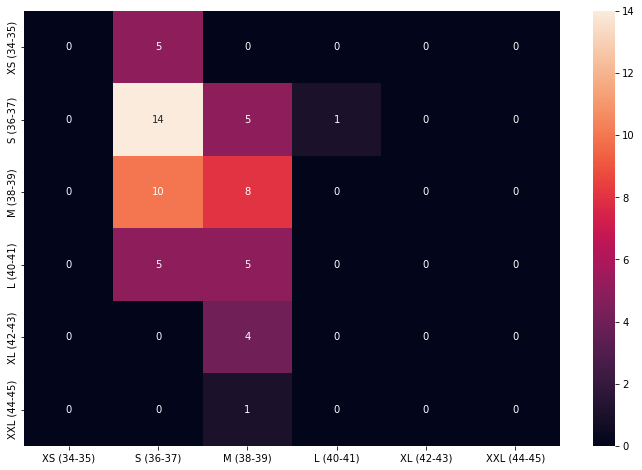

In [188]:
conf_m = confusion_matrix(y_test_ws, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [189]:
best_kneighbors_without_gender_feature.fit(X_ws, y_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=34))])

In [190]:
with open('..\models\jeans_size_pred_models\kneighbors_classifier_without_gender_feature.pkl', 'wb') as f:
    pickle.dump(best_kneighbors_without_gender_feature, f)

K Neighbors results.
<br>
with all features = 46.5% accuracy score, std = 8% 
<br>
without age feature = 47.6% accuracy score, std = 5%
<br>
without sex seature = 47.4% accuracy score, std = 7%

# Voting Classifier

In [191]:
from sklearn.ensemble import VotingClassifier

In [192]:
import itertools

def all_sub_arrays(xs):
    n = len(xs)
    indices = list(range(n+1))
    for i,j in itertools.combinations(indices,2):
        yield xs[i:j]

In [193]:
all_models = [('log_reg', best_log_reg.named_steps.model), ('dec_tree', best_tree.named_steps.model), 
              ('svm', best_svc.named_steps.model), ('kneighbors', best_kneighbors.named_steps.model)]

In [194]:
all_model_combs = list(all_sub_arrays(all_models))

In [195]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [196]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', VotingClassifier(estimators=[]))])

In [197]:
param_grid = [
    {
        'model__estimators': all_model_combs, 
        'model__voting': ['soft'],
    }
]

In [198]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.609 total time=   0.0s
[CV 2/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 3/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 4/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.609 total time=   0.0s
[CV 5/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.304 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=so

[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;, score=0.304 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 8/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;,

[CV 4/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.652 total time=   0.0s
[CV 5/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 6/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.348 total time=   0.0s
[CV 7/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 8/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 9/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.500 total time=   0.0s
[CV 10/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.636 total time=   0.0

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model',
                                              VotingClassifier(estimators=[]))]),
                   n_iter=

In [199]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       0.035704      0.001882         0.005187        0.000399   
8       0.038398      0.003631         0.007480        0.002241   
9       0.010572      0.001198         0.005684        0.000457   
4       0.008876      0.001041         0.004588        0.000914   
3       0.115286      0.013614         0.007483        0.001430   

  param_model__voting                            param_model__estimators  \
5                soft  [(dec_tree, DecisionTreeClassifier(max_depth=9...   
8                soft  [(svm, SVC(C=3, coef0=6, gamma=0.1, probabilit...   
9                soft  [(kneighbors, KNeighborsClassifier(n_neighbors...   
4                soft  [(dec_tree, DecisionTreeClassifier(max_depth=9...   
3                soft  [(log_reg, LogisticRegression(C=13, max_iter=7...   

                                              params  split0_test_score  \
5  {'model__voting': 'soft', 'model__estimators':...           0.608696   
8  {'model__voting': 'soft', 'model__estimators':...           0.608696   
9  {'model__voting': 'soft', 'model__estimators':...           0.565217   
4  {'model__voting': 'soft', 'model__estimators':...           0.565217   
3  {'model__voting': 'soft', 'model__estimators':...           0.608696   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5           0.521739           0.521739           0.565217           0.608696   
8           0.521739           0.434783           0.695652           0.521739   
9           0.565217           0.434783           0.695652           0.521739   
4           0.521739           0.521739           0.521739           0.608696   
3           0.521739           0.521739           0.695652           0.565217   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
5           0.434783           0.434783           0.565217           0.545455   
8           0.347826           0.434783           0.565217           0.545455   
9           0.347826           0.434783           0.565217           0.545455   
4           0.478261           0.391304           0.565217           0.590909   
3           0.304348           0.434783           0.434783           0.500000   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
5           0.545455         0.535178        0.057745                1  
8           0.590909         0.526680        0.094957                2  
9           0.590909         0.526680        0.092945                2  
4           0.500000         0.526482        0.059395                4  
3           0.590909         0.517787        0.103528                5

In [200]:
rand_search.best_params_

{'model__voting': 'soft',
 'model__estimators': [('dec_tree',
   DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)),
  ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))]}

In [201]:
best_voting_cls = rand_search.best_estimator_
best_voting_cls.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('dec_tree',
                                               DecisionTreeClassifier(max_depth=9,
                                                                      min_samples_leaf=24,
                                                                      min_samples_split=26)),
                                              ('svm',
                                               SVC(C=3, coef0=6, gamma=0.1,
                                                   probability=True)

In [202]:
y_pred = best_voting_cls.predict(X_test)
y_pred

array([2, 3, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 1, 3, 2, 3, 2,
       2, 1, 1, 1, 3, 2, 2, 1, 1, 2, 1, 3, 2, 1, 1, 3, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 1, 2, 3, 2, 3, 1, 1, 2, 1, 2, 1], dtype=int64)

In [203]:
y_test.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [204]:
accuracy_score(y_test, y_pred)

0.3793103448275862

In [205]:
x_axis = np.unique(np.concatenate([y_test.values, y_pred]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

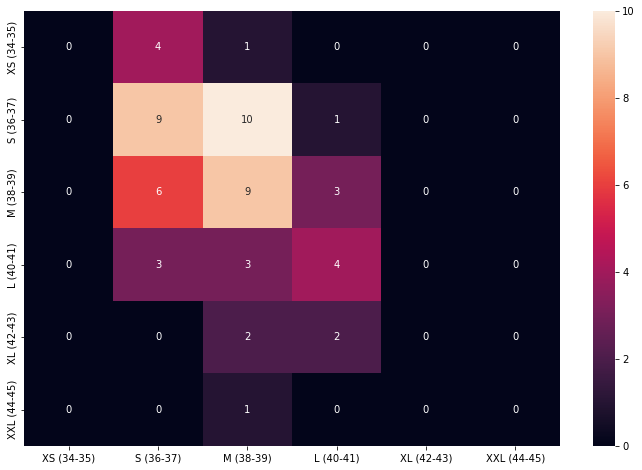

In [206]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [207]:
best_voting_cls.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('dec_tree',
                                               DecisionTreeClassifier(max_depth=9,
                                                                      min_samples_leaf=24,
                                                                      min_samples_split=26)),
                                              ('svm',
                                               SVC(C=3, coef0=6, gamma=0.1,
                                                   probability=True)

In [208]:
with open(r'..\models\jeans_size_pred_models\voting_classifier.pkl', 'wb') as f:
    pickle.dump(best_voting_cls, f)

Without Age Feature

In [209]:
all_models_without_age_feature = [('log_reg', best_log_reg_without_age_feature.named_steps.model), 
                                  ('dec_tree', best_tree_without_age_feature.named_steps.model), 
                                  ('svm', best_svc_without_age_feature.named_steps.model),
                                  ('kneighbors', best_kneighbors_without_age_feature.named_steps.model)]

In [210]:
all_model_combs_without_age_feature = list(all_sub_arrays(all_models_without_age_feature))

In [211]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight'])])

In [212]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', VotingClassifier(estimators=[]))])

In [213]:
param_grid = [
    {
        'model__estimators': all_model_combs, 
        'model__voting': ['soft'],
    }
]

In [214]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_wa, y_train_wa)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 2/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 3/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 4/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 5/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=so

[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 8/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;,

[CV 2/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 3/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 4/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 5/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 6/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 7/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 8/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.522 total time=   0.0s

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model',
                                              VotingClassifier(estimators=[]))]),
                   n_iter=500,
                   param_distributions=[{'model__estimators': [[('log_reg',
      

In [215]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
8       0.032913      0.002816         0.006479        0.001117   
4       0.009671      0.000901         0.004887        0.000698   
5       0.034308      0.004746         0.006483        0.001560   
9       0.009973      0.001839         0.006483        0.001281   
1       0.094551      0.012822         0.005883        0.001373   

  param_model__voting                            param_model__estimators  \
8                soft  [(svm, SVC(C=3, coef0=6, gamma=0.1, probabilit...   
4                soft  [(dec_tree, DecisionTreeClassifier(max_depth=9...   
5                soft  [(dec_tree, DecisionTreeClassifier(max_depth=9...   
9                soft  [(kneighbors, KNeighborsClassifier(n_neighbors...   
1                soft  [(log_reg, LogisticRegression(C=13, max_iter=7...   

                                              params  split0_test_score  \
8  {'model__voting': 'soft', 'model__estimators':...           0.565217   
4  {'model__voting': 'soft', 'model__estimators':...           0.565217   
5  {'model__voting': 'soft', 'model__estimators':...           0.565217   
9  {'model__voting': 'soft', 'model__estimators':...           0.608696   
1  {'model__voting': 'soft', 'model__estimators':...           0.608696   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
8           0.521739           0.478261           0.608696           0.521739   
4           0.521739           0.521739           0.521739           0.608696   
5           0.521739           0.521739           0.521739           0.608696   
9           0.521739           0.478261           0.608696           0.521739   
1           0.521739           0.521739           0.478261           0.608696   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
8           0.434783           0.434783           0.565217           0.500000   
4           0.478261           0.391304           0.565217           0.590909   
5           0.391304           0.434783           0.565217           0.545455   
9           0.391304           0.434783           0.565217           0.545455   
1           0.391304           0.347826           0.608696           0.545455   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
8           0.636364         0.526680        0.064593                1  
4           0.500000         0.526482        0.059395                2  
5           0.545455         0.522134        0.060861                3  
9           0.545455         0.522134        0.066784                3  
1           0.500000         0.513241        0.084939                5

In [216]:
rand_search.best_params_

{'model__voting': 'soft',
 'model__estimators': [('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)),
  ('kneighbors', KNeighborsClassifier(n_neighbors=23))]}

In [217]:
best_voting_cls_without_age_feature = rand_search.best_estimator_
best_voting_cls_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('svm',
                                               SVC(C=3, coef0=6, gamma=0.1,
                                                   probability=True)),
                                              ('kneighbors',
                                               KNeighborsClassifier(n_neighbors=23))],
                                  voting='soft'))])

In [218]:
y_pred = best_voting_cls_without_age_feature.predict(X_test_wa)
y_pred

array([2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 3, 1, 2, 1, 3, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 2, 2, 1, 2, 2,
       2, 2, 3, 1, 1, 3, 2, 3, 1, 1, 1, 1, 2, 1], dtype=int64)

In [219]:
y_test_wa.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [220]:
accuracy_score(y_test_wa, y_pred)

0.39655172413793105

In [221]:
x_axis = np.unique(np.concatenate([y_test_wa.values, y_pred]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

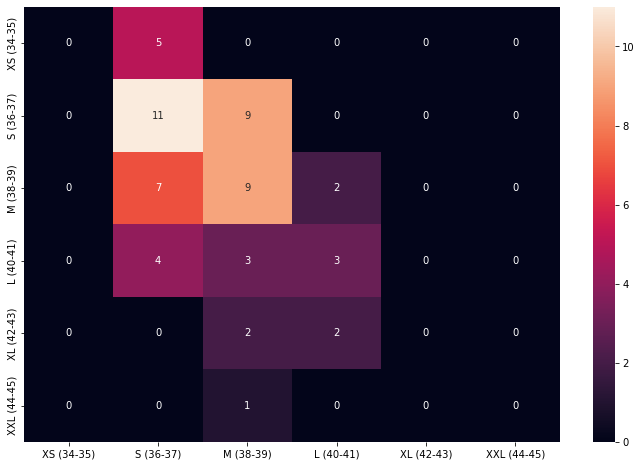

In [222]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [223]:
best_voting_cls_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('svm',
                                               SVC(C=3, coef0=6, gamma=0.1,
                                                   probability=True)),
                                              ('kneighbors',
                                               KNeighborsClassifier(n_neighbors=23))],
                                  voting='soft'))])

In [224]:
with open(r'..\models\jeans_size_pred_models\voting_classifier_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_voting_cls_without_age_feature, f)

Without Sex feature

In [225]:
all_models_without_gender_feature = [('log_reg', best_log_reg_without_gender_feature.named_steps.model), 
                                     ('dec_tree', best_tree_without_gender_feature.named_steps.model), 
                                     ('svm', best_svc_without_gender_feature.named_steps.model),
                                     ('kneighbors', best_kneighbors_without_gender_feature.named_steps.model)]

In [226]:
all_model_combs_without_gender_feature = list(all_sub_arrays(all_models_without_gender_feature))

In [227]:
pipeline = Pipeline([('standard_scaler', StandardScaler()),
                     ('model', VotingClassifier(estimators=[]))])

In [228]:
param_grid = [
    {
        'model__estimators': all_model_combs, 
        'model__voting': ['soft'],
    }
]

In [229]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_ws, y_train_ws)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 2/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 3/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 4/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.609 total time=   0.0s
[CV 5/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=soft;, score=0.261 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700))], model__voting=so

[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;, score=0.217 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 8/10] END model__estimators=[('log_reg', LogisticRegression(C=13, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;,

[CV 9/10] END model__estimators=[('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;, score=0.545 total time=   0.0s
[CV 10/10] END model__estimators=[('dec_tree', DecisionTreeClassifier(max_depth=9, min_samples_leaf=24, min_samples_split=26)), ('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=23))], model__voting=soft;, score=0.545 total time=   0.0s
[CV 1/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 2/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 3/10] END model__estimators=[('svm', SVC(C=3, coef0=6, gamma=0.1, probability=True))], model__voting=soft;, score=0.435 total t

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standard_scaler',
                                              StandardScaler()),
                                             ('model',
                                              VotingClassifier(estimators=[]))]),
                   n_iter=500,
                   param_distributions=[{'model__estimators': [[('log_reg',
                                                                 LogisticRegression(C=13,
                                                                                    max_iter=700))],
                                                               [('log_reg',
                                                                 LogisticRegression(C=13,
                                                                                    max_iter=700)),
                                                                ('dec_tree',
                                                                 D

In [230]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.041187      0.010083         0.001496        0.000669   
3       0.065725      0.010301         0.004088        0.001133   
6       0.027438      0.002250         0.003482        0.000515   
8       0.026030      0.002065         0.003590        0.000917   
4       0.004987      0.000630         0.001695        0.000457   

  param_model__voting                            param_model__estimators  \
0                soft  [(log_reg, LogisticRegression(C=13, max_iter=7...   
3                soft  [(log_reg, LogisticRegression(C=13, max_iter=7...   
6                soft  [(dec_tree, DecisionTreeClassifier(max_depth=9...   
8                soft  [(svm, SVC(C=3, coef0=6, gamma=0.1, probabilit...   
4                soft  [(dec_tree, DecisionTreeClassifier(max_depth=9...   

                                              params  split0_test_score  \
0  {'model__voting': 'soft', 'model__estimators':...           0.565217   
3  {'model__voting': 'soft', 'model__estimators':...           0.608696   
6  {'model__voting': 'soft', 'model__estimators':...           0.608696   
8  {'model__voting': 'soft', 'model__estimators':...           0.608696   
4  {'model__voting': 'soft', 'model__estimators':...           0.521739   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.434783           0.521739           0.608696           0.565217   
3           0.521739           0.478261           0.652174           0.521739   
6           0.521739           0.478261           0.608696           0.565217   
8           0.521739           0.434783           0.695652           0.521739   
4           0.434783           0.521739           0.521739           0.608696   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.260870           0.391304           0.521739           0.590909   
3           0.217391           0.391304           0.434783           0.590909   
6           0.260870           0.391304           0.434783           0.545455   
8           0.260870           0.391304           0.521739           0.545455   
4           0.521739           0.391304           0.478261           0.500000   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.545455         0.500593        0.102394                1  
3           0.545455         0.496245        0.119380                2  
6           0.545455         0.496047        0.102983                3  
8           0.454545         0.495652        0.113449                4  
4           0.409091         0.490909        0.061387                5

In [231]:
rand_search.best_params_

{'model__voting': 'soft',
 'model__estimators': [('log_reg', LogisticRegression(C=13, max_iter=700))]}

In [232]:
best_voting_cls_without_gender_feature = rand_search.best_estimator_
best_voting_cls_without_gender_feature.fit(X_train_ws, y_train_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('log_reg',
                                               LogisticRegression(C=13,
                                                                  max_iter=700))],
                                  voting='soft'))])

In [233]:
y_pred = best_voting_cls_without_gender_feature.predict(X_test_ws)
y_pred

array([2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 2, 4,
       2, 2, 2, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1], dtype=int64)

In [234]:
y_test_ws.values

array([1, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 1, 0, 4, 1, 1, 2, 3, 2, 1, 0,
       2, 1, 2, 0, 2, 5, 2, 1, 3, 2, 2, 3, 2, 1, 1, 3, 0, 3, 3, 1, 2, 4,
       2, 1, 2, 0, 1, 4, 4, 3, 3, 1, 1, 2, 1, 3], dtype=int64)

In [235]:
accuracy_score(y_test_ws, y_pred)

0.43103448275862066

In [236]:
x_axis = np.unique(np.concatenate([y_test_ws.values, y_pred]))
x_axis = [j_sizes[i] for i in x_axis]
x_axis

['XS (34-35)',
 'S (36-37)',
 'M (38-39)',
 'L (40-41)',
 'XL (42-43)',
 'XXL (44-45)']

[Text(0, 0.5, 'XS (34-35)'),
 Text(0, 1.5, 'S (36-37)'),
 Text(0, 2.5, 'M (38-39)'),
 Text(0, 3.5, 'L (40-41)'),
 Text(0, 4.5, 'XL (42-43)'),
 Text(0, 5.5, 'XXL (44-45)')]

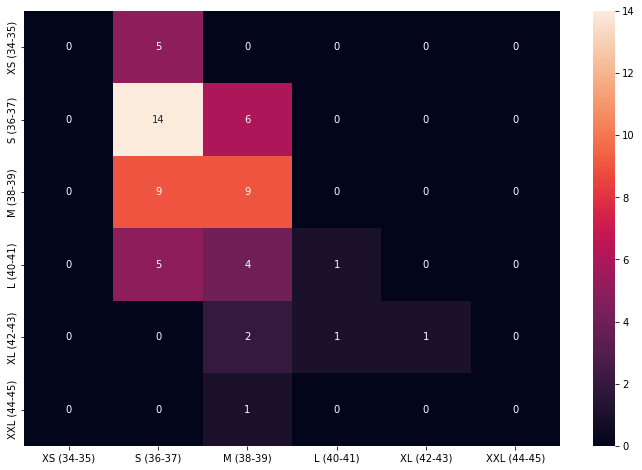

In [237]:
conf_m = confusion_matrix(y_test_ws, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [238]:
best_voting_cls_without_gender_feature.fit(X_ws, y_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('log_reg',
                                               LogisticRegression(C=13,
                                                                  max_iter=700))],
                                  voting='soft'))])

In [239]:
with open(r'..\models\jeans_size_pred_models\voting_classifier_without_gender_feature.pkl', 'wb') as f:
    pickle.dump(best_voting_cls_without_gender_feature, f)

Voting Classifier results.
<br>
with all features = 53.5% accuracy score, std = 5% 
<br>
without age feature = 52.6% accuracy score, std = 6%
<br>
without sex seature = 50.0% accuracy score, std = 10%